In [166]:
import pandas as pd

import warnings
warnings.filterwarnings(action='ignore')

In [169]:
df = pd.read_csv('esg_data.csv')

In [170]:
df

NO     Í∏∞ÏóÖÎ™Ö    Í∏∞ÏóÖÏΩîÎìú ESGÎì±Í∏â    ÌôòÍ≤Ω    ÏÇ¨Ìöå ÏßÄÎ∞∞Íµ¨Ï°∞    ÎÖÑÎèÑ        Ï≤®Î∂Ä
0     2116  AJÎÑ§Ìä∏ÏõçÏä§   95570    B+     C     A   B+  2023  pdf Îã§Ïö¥Î°úÎìú
1     2115  AJÎÑ§Ìä∏ÏõçÏä§   95570    B+     C     A   B+  2024  pdf Îã§Ïö¥Î°úÎìú
2     2114   AKÌôÄÎî©Ïä§    6840     A     A    A+   B+  2023  pdf Îã§Ïö¥Î°úÎìú
3     2113   AKÌôÄÎî©Ïä§    6840     A     A    A+   B+  2024  pdf Îã§Ïö¥Î°úÎìú
4     2112     BGF   27410     A     A    A+   B+  2023  pdf Îã§Ïö¥Î°úÎìú
...    ...     ...     ...   ...   ...   ...  ...   ...       ...
2110     5  Ìù•Íµ≠ÏÉùÎ™ÖÎ≥¥Ìóò  818586  Îì±Í∏âÏóÜÏùå  Îì±Í∏âÏóÜÏùå  Îì±Í∏âÏóÜÏùå    B  2024       NaN
2111     4    Ìù•Íµ≠ÌôîÏû¨     540    B+     B    B+   B+  2023  pdf Îã§Ïö¥Î°úÎìú
2112     3    Ìù•Íµ≠ÌôîÏû¨     540    B+     C    B+   B+  2024  pdf Îã§Ïö¥Î°úÎìú
2113     2    Ìù•ÏïÑÌï¥Ïö¥    3280     B     B    B+    B  2023  pdf Îã§Ïö¥Î°úÎìú
2114     1    Ìù•ÏïÑÌï¥Ïö¥    3280     B     B    B+    B  2024  pdf Îã§Ïö¥Î°úÎìú

[2115 rows x 9 columns]

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2115 entries, 0 to 2114
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   NO      2115 non-null   int64 
 1   Í∏∞ÏóÖÎ™Ö     2115 non-null   object
 2   Í∏∞ÏóÖÏΩîÎìú    2115 non-null   int64 
 3   ESGÎì±Í∏â   2115 non-null   object
 4   ÌôòÍ≤Ω      2115 non-null   object
 5   ÏÇ¨Ìöå      2115 non-null   object
 6   ÏßÄÎ∞∞Íµ¨Ï°∞    2115 non-null   object
 7   ÎÖÑÎèÑ      2115 non-null   int64 
 8   Ï≤®Î∂Ä      1934 non-null   object
dtypes: int64(3), object(6)
memory usage: 148.8+ KB


In [174]:
expected = set(range(1, 2117))  # 1Î∂ÄÌÑ∞ 2116ÍπåÏßÄ
print(len(expected))

df["NO"] = df["NO"].astype(int)
actual = set(df["NO"])
print(len(actual))
missing = sorted(expected - actual)

print("‚ùó ÎàÑÎùΩÎêú NO Î≤àÌò∏:", missing)

2116
2115
‚ùó ÎàÑÎùΩÎêú NO Î≤àÌò∏: [1003]


In [176]:
df["ÎÖÑÎèÑ"] = df["ÎÖÑÎèÑ"].astype(int)

In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2115 entries, 0 to 2114
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   NO      2115 non-null   int32 
 1   Í∏∞ÏóÖÎ™Ö     2115 non-null   object
 2   Í∏∞ÏóÖÏΩîÎìú    2115 non-null   int64 
 3   ESGÎì±Í∏â   2115 non-null   object
 4   ÌôòÍ≤Ω      2115 non-null   object
 5   ÏÇ¨Ìöå      2115 non-null   object
 6   ÏßÄÎ∞∞Íµ¨Ï°∞    2115 non-null   object
 7   ÎÖÑÎèÑ      2115 non-null   int32 
 8   Ï≤®Î∂Ä      1934 non-null   object
dtypes: int32(2), int64(1), object(6)
memory usage: 132.3+ KB


In [178]:
# ÎÖÑÎèÑÎ•º ÎπÑÍµêÌïòÍ∏∞ ÏúÑÌï¥ Í∏∞ÏóÖÎ™ÖÏóê Ï§ëÎ≥µÎêú Ìï≠Î™©ÏùÑ Í∞ÄÏßÑ Í∏∞ÏóÖÎì§Îßå ÎÇ®Í∏¥Îã§.
# 1. Ï¢ÖÎ™©Î™ÖÎ≥ÑÎ°ú Ïó∞ÎèÑ Í∞úÏàò ÏÑ∏Í∏∞
counts = df.groupby("Í∏∞ÏóÖÎ™Ö")["ÎÖÑÎèÑ"].nunique().reset_index()
counts = counts[counts["ÎÖÑÎèÑ"] == 2]  # 2023, 2024 Îëò Îã§ ÏûàÎäî Í∏∞ÏóÖÎßå ÎÇ®ÍπÄ

In [180]:
counts.head()
len(counts)

993

In [181]:
# 2. Ï¢ÖÎ™©Î™Ö Í∏∞Ï§ÄÏúºÎ°ú inner join (Îëê Ïó∞ÎèÑ Îã§ ÏûàÎäî Í∏∞ÏóÖÎßå Ï∂îÏ∂ú)
df_esg_cleaned = df[df["Í∏∞ÏóÖÎ™Ö"].isin(counts["Í∏∞ÏóÖÎ™Ö"])]

In [183]:
df_esg_cleaned

NO     Í∏∞ÏóÖÎ™Ö    Í∏∞ÏóÖÏΩîÎìú ESGÎì±Í∏â    ÌôòÍ≤Ω    ÏÇ¨Ìöå ÏßÄÎ∞∞Íµ¨Ï°∞    ÎÖÑÎèÑ        Ï≤®Î∂Ä
0     2116  AJÎÑ§Ìä∏ÏõçÏä§   95570    B+     C     A   B+  2023  pdf Îã§Ïö¥Î°úÎìú
1     2115  AJÎÑ§Ìä∏ÏõçÏä§   95570    B+     C     A   B+  2024  pdf Îã§Ïö¥Î°úÎìú
2     2114   AKÌôÄÎî©Ïä§    6840     A     A    A+   B+  2023  pdf Îã§Ïö¥Î°úÎìú
3     2113   AKÌôÄÎî©Ïä§    6840     A     A    A+   B+  2024  pdf Îã§Ïö¥Î°úÎìú
4     2112     BGF   27410     A     A    A+   B+  2023  pdf Îã§Ïö¥Î°úÎìú
...    ...     ...     ...   ...   ...   ...  ...   ...       ...
2110     5  Ìù•Íµ≠ÏÉùÎ™ÖÎ≥¥Ìóò  818586  Îì±Í∏âÏóÜÏùå  Îì±Í∏âÏóÜÏùå  Îì±Í∏âÏóÜÏùå    B  2024       NaN
2111     4    Ìù•Íµ≠ÌôîÏû¨     540    B+     B    B+   B+  2023  pdf Îã§Ïö¥Î°úÎìú
2112     3    Ìù•Íµ≠ÌôîÏû¨     540    B+     C    B+   B+  2024  pdf Îã§Ïö¥Î°úÎìú
2113     2    Ìù•ÏïÑÌï¥Ïö¥    3280     B     B    B+    B  2023  pdf Îã§Ïö¥Î°úÎìú
2114     1    Ìù•ÏïÑÌï¥Ïö¥    3280     B     B    B+    B  2024  pdf Îã§Ïö¥Î°úÎìú

[1986 rows x 9 columns]

In [184]:
# Í∑∏Î¶¨Í≥† Îì±Í∏âÏóÜÏùåÏóê Ìï¥ÎãπÎêòÎäî Í∏∞ÏóÖÎì§ÏùÄ Îã§ ÏÇ≠Ï†úÏãúÌÇ®Îã§.
# Ï†úÍ±∞ ÎåÄÏÉÅ Ïó¥ Î¶¨Ïä§Ìä∏
target_cols = ["ESGÎì±Í∏â", "ÌôòÍ≤Ω", "ÏÇ¨Ìöå", "ÏßÄÎ∞∞Íµ¨Ï°∞"]

# 'Îì±Í∏âÏóÜÏùå'Ïù¥ ÌïòÎÇòÎùºÎèÑ Ìè¨Ìï®Îêú Ìñâ Ï†úÍ±∞
df_esg_cleaned = df_esg_cleaned[~df_esg_cleaned[target_cols].isin(["Îì±Í∏âÏóÜÏùå"]).any(axis=1)]


In [187]:
# Í∞Å Ïó¥Î≥ÑÎ°ú 'Îì±Í∏âÏóÜÏùå'Ïù¥ Ï°¥Ïû¨ÌïòÎäîÏßÄ ÌôïÏù∏
for col in target_cols:
    has_no_grade = df_esg_cleaned[col].str.contains("Îì±Í∏âÏóÜÏùå", na=False).any()
    print(f"[{col}]Ïóê 'Îì±Í∏âÏóÜÏùå' Ìè¨Ìï® Ïó¨Î∂Ä: {has_no_grade}")

[ESGÎì±Í∏â]Ïóê 'Îì±Í∏âÏóÜÏùå' Ìè¨Ìï® Ïó¨Î∂Ä: False
[ÌôòÍ≤Ω]Ïóê 'Îì±Í∏âÏóÜÏùå' Ìè¨Ìï® Ïó¨Î∂Ä: False
[ÏÇ¨Ìöå]Ïóê 'Îì±Í∏âÏóÜÏùå' Ìè¨Ìï® Ïó¨Î∂Ä: False
[ÏßÄÎ∞∞Íµ¨Ï°∞]Ïóê 'Îì±Í∏âÏóÜÏùå' Ìè¨Ìï® Ïó¨Î∂Ä: False


In [188]:
df_esg_cleaned.info()
# Ìñâ Í∞úÏàòÍ∞Ä 1986Í∞úÏóêÏÑú Îì±Í∏âÏóÜÏùå ÌñâÎì§Ïù¥ ÏóÜÏñ¥ÏßÄÎãà 1868Í∞úÎ°ú Ï§ÑÏñ¥Îì§ÏóàÎã§.

<class 'pandas.core.frame.DataFrame'>
Index: 1868 entries, 0 to 2114
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   NO      1868 non-null   int32 
 1   Í∏∞ÏóÖÎ™Ö     1868 non-null   object
 2   Í∏∞ÏóÖÏΩîÎìú    1868 non-null   int64 
 3   ESGÎì±Í∏â   1868 non-null   object
 4   ÌôòÍ≤Ω      1868 non-null   object
 5   ÏÇ¨Ìöå      1868 non-null   object
 6   ÏßÄÎ∞∞Íµ¨Ï°∞    1868 non-null   object
 7   ÎÖÑÎèÑ      1868 non-null   int32 
 8   Ï≤®Î∂Ä      1814 non-null   object
dtypes: int32(2), int64(1), object(6)
memory usage: 131.3+ KB


In [192]:
# Ï¥ù 10Í∞úÏùò Í∏∞ÏóÖÎ≥Ñ Ï¢ÖÍ∞Ä Îç∞Ïù¥ÌÑ∞Î•º Î∂àÎü¨Ïò®Îã§.

# 2024ÎÖÑ ESG Îì±Í∏â Î∞úÌëú Ï†Ñ Ï¢ÖÍ∞Ä Îç∞ÌÑ∞ÌÑ∞
df_20241017_jongga = pd.read_csv('20241017_Ï¢ÖÍ∞Ä.csv', encoding="cp949")
df_20241018_jongga = pd.read_csv('20241018_Ï¢ÖÍ∞Ä.csv', encoding="cp949")
df_20241021_jongga = pd.read_csv('20241021_Ï¢ÖÍ∞Ä.csv', encoding="cp949")
df_20241022_jongga = pd.read_csv('20241022_Ï¢ÖÍ∞Ä.csv', encoding="cp949")
df_20241023_jongga = pd.read_csv('20241023_Ï¢ÖÍ∞Ä.csv', encoding="cp949")

# 2024ÎÖÑ ESG Îì±Í∏â Î∞úÌëú ÌõÑ Ï¢ÖÍ∞Ä Îç∞Ïù¥ÌÑ∞
df_20241025_jongga = pd.read_csv('20241025_Ï¢ÖÍ∞Ä.csv', encoding="cp949")
df_20241028_jongga = pd.read_csv('20241028_Ï¢ÖÍ∞Ä.csv', encoding="cp949")
df_20241029_jongga = pd.read_csv('20241029_Ï¢ÖÍ∞Ä.csv', encoding="cp949")
df_20241030_jongga = pd.read_csv('20241030_Ï¢ÖÍ∞Ä.csv', encoding="cp949")
df_20241031_jongga = pd.read_csv('20241031_Ï¢ÖÍ∞Ä.csv', encoding="cp949")

In [193]:
jongga_datalist = [df_20241017_jongga, df_20241018_jongga, df_20241021_jongga, df_20241022_jongga, df_20241023_jongga, 
                  df_20241025_jongga, df_20241028_jongga, df_20241029_jongga, df_20241030_jongga, df_20241031_jongga]

for df in jongga_datalist:
    print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2547 entries, 0 to 2546
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Ï¢ÖÎ™©ÏΩîÎìú                  2547 non-null   int64 
 1   Ï¢ÖÎ™©Î™Ö                   2547 non-null   object
 2   ÏûêÍ∏∞Ï£ºÏãù Ï†úÏô∏ ÏãúÍ∞ÄÏ¥ùÏï°(A*B)     2547 non-null   int64 
 3   Ï¢ÖÍ∞Ä                    2547 non-null   int64 
 4   ÏûêÍ∏∞Ï£ºÏãù Ï†úÏô∏ Î∞úÌñâÏ£ºÏãùÏàò(B=C-D)  2547 non-null   int64 
 5   Ï¥ùÎ∞úÌñâÏ£ºÏãùÏàò(C)             2547 non-null   int64 
 6   ÏûêÍ∏∞Ï£ºÏãùÏàò(D)              2547 non-null   int64 
 7   ÏûêÍ∏∞Ï£ºÏãùÏàò Î∞òÏòÅÏãúÏ†ê            2547 non-null   object
dtypes: int64(6), object(2)
memory usage: 159.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2549 entries, 0 to 2548
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Ï¢ÖÎ™©ÏΩîÎìú            

### ÎåÄÎ∂ÄÎ∂Ñ ÌïòÎÇòÏùò Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑÏóê 2550 Í∞úÏùò Í∏∞ÏóÖÎì§Ïù¥ ÏûàÏßÄÎßå ÌòÑÏû¨ ESG Îì±Í∏â Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑÏóê Ï°¥Ïû¨ÌïòÎäî
### Í∏∞ÏóÖÎì§Ïùò Ï¢ÖÍ∞ÄÎßåÏùÑ Ïù¥Ïö©Ìï¥Ïïº ÌïòÎØÄÎ°ú ESG Îì±Í∏â Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑÏóê Ï¢ÖÍ∞ÄÎç∞Ïù¥ÌÑ∞Î•º 
### Í∏∞ÏóÖÎ™ÖÏóê ÎßûÏ∂∞ÏÑú ÎÑ£Ïñ¥Ï§ÄÎã§.
### Í∑∏Î¶¨Í≥† Í∏∞ÏóÖÎ™ÖÍ≥º Ï¢ÖÍ∞Ä Ï†ïÎ≥¥Îßå ÌïÑÏö©ÌïòÎØÄÎ°ú Ìï¥Îãπ Ïó¥Îì§Îßå Ï∂îÏ∂úÌï¥Ï§ÄÎã§.

In [199]:
for i in range(len(jongga_datalist)):
    df = jongga_datalist[i][['Ï¢ÖÎ™©Î™Ö', 'Ï¢ÖÍ∞Ä']].copy()
    df.rename(columns={'Ï¢ÖÎ™©Î™Ö': 'Í∏∞ÏóÖÎ™Ö'}, inplace=True)
    jongga_datalist[i] = df

In [200]:
for df in jongga_datalist:
    print(df.head())

      Í∏∞ÏóÖÎ™Ö     Ï¢ÖÍ∞Ä
0      3S   2065
1  AJÎÑ§Ìä∏ÏõçÏä§   4850
2   AKÌôÄÎî©Ïä§  13190
3     APS   5960
4   APÏãúÏä§ÌÖú  18400
      Í∏∞ÏóÖÎ™Ö     Ï¢ÖÍ∞Ä
0      3S   2055
1  AJÎÑ§Ìä∏ÏõçÏä§   4830
2   AKÌôÄÎî©Ïä§  12770
3     APS   5980
4   APÏãúÏä§ÌÖú  17570
      Í∏∞ÏóÖÎ™Ö     Ï¢ÖÍ∞Ä
0      3S   2070
1  AJÎÑ§Ìä∏ÏõçÏä§   4845
2   AKÌôÄÎî©Ïä§  12530
3     APS   5960
4   APÏãúÏä§ÌÖú  17980
      Í∏∞ÏóÖÎ™Ö     Ï¢ÖÍ∞Ä
0      3S   2025
1  AJÎÑ§Ìä∏ÏõçÏä§   4860
2   AKÌôÄÎî©Ïä§  12730
3     APS   6000
4   APÏãúÏä§ÌÖú  17580
      Í∏∞ÏóÖÎ™Ö     Ï¢ÖÍ∞Ä
0      3S   2165
1  AJÎÑ§Ìä∏ÏõçÏä§   4795
2   AKÌôÄÎî©Ïä§  12980
3     APS   6200
4   APÏãúÏä§ÌÖú  17890
      Í∏∞ÏóÖÎ™Ö     Ï¢ÖÍ∞Ä
0      3S   2055
1  AJÎÑ§Ìä∏ÏõçÏä§   4855
2   AKÌôÄÎî©Ïä§  12230
3     APS   6240
4   APÏãúÏä§ÌÖú  17210
      Í∏∞ÏóÖÎ™Ö     Ï¢ÖÍ∞Ä
0      3S   2110
1  AJÎÑ§Ìä∏ÏõçÏä§   4900
2   AKÌôÄÎî©Ïä§  12280
3     APS   6330
4   APÏãúÏä§ÌÖú  17560
      Í∏∞ÏóÖÎ™Ö     Ï¢ÖÍ∞Ä
0      3S   2145
1  AJÎÑ§Ìä∏ÏõçÏä§   4910
2   AKÌ

In [203]:
df_20241017_jongga.head()

Ï¢ÖÎ™©ÏΩîÎìú     Ï¢ÖÎ™©Î™Ö  ÏûêÍ∏∞Ï£ºÏãù Ï†úÏô∏ ÏãúÍ∞ÄÏ¥ùÏï°(A*B)     Ï¢ÖÍ∞Ä  ÏûêÍ∏∞Ï£ºÏãù Ï†úÏô∏ Î∞úÌñâÏ£ºÏãùÏàò(B=C-D)  Ï¥ùÎ∞úÌñâÏ£ºÏãùÏàò(C)  \
0   60310      3S       105489785730   2065              51084642   51084642   
1   95570  AJÎÑ§Ìä∏ÏõçÏä§       217042592500   4850              44751050   45252759   
2    6840   AKÌôÄÎî©Ïä§       172070079050  13190              13045495   13247561   
3   54620     APS       108289886240   5960              18169444   19894221   
4  265520   APÏãúÏä§ÌÖú       276370465600  18400              15020134   15281421   

   ÏûêÍ∏∞Ï£ºÏãùÏàò(D) ÏûêÍ∏∞Ï£ºÏãùÏàò Î∞òÏòÅÏãúÏ†ê  
0         0    2024-09  
1    501709    2024-09  
2    202066    2024-09  
3   1724777    2024-09  
4    261287    2024-09

In [204]:
df_esg_cleaned

# ESG Í∏∞Ï§Ä Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ
df_esg_cleaned = df_esg_cleaned[['Í∏∞ÏóÖÎ™Ö', 'ESGÎì±Í∏â', 'ÌôòÍ≤Ω', 'ÏÇ¨Ìöå', 'ÏßÄÎ∞∞Íµ¨Ï°∞', 'ÎÖÑÎèÑ']]

# Ï¢ÖÍ∞Ä Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ Î¶¨Ïä§Ìä∏: [(ÎÇ†ÏßúÎ¨∏ÏûêÏó¥, Ï¢ÖÍ∞Ä_df), ...]
# Ïòà: [("20241025", df_20241025_jongga), ("20241101", df_20241101_jongga)]
jongga_datalist = [("20241017", df_20241017_jongga),
                   ("20241018", df_20241018_jongga),
                   ("20241021", df_20241021_jongga),
                   ("20241022", df_20241022_jongga),
                   ("20241023", df_20241023_jongga),
                   ("20241025", df_20241025_jongga),
                   ("20241028", df_20241028_jongga),
                   ("20241029", df_20241029_jongga),
                   ("20241030", df_20241030_jongga),
                   ("20241031", df_20241031_jongga)]

# Î∞òÎ≥µÏ†ÅÏúºÎ°ú ESG Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏóê Î≥ëÌï©
for date_str, df in jongga_datalist:
    # 1. ÌïÑÏöîÌïú Ïó¥Îßå ÏÑ†ÌÉù
    df.rename(columns={'Ï¢ÖÎ™©Î™Ö': 'Í∏∞ÏóÖÎ™Ö'}, inplace=True)
    df = df[['Í∏∞ÏóÖÎ™Ö', 'Ï¢ÖÍ∞Ä']].copy()
    
    # 2. Ï¢ÖÍ∞Ä Ïó¥ Ïù¥Î¶Ñ Î≥ÄÍ≤Ω
    df.rename(columns={'Ï¢ÖÍ∞Ä': f'{date_str}_Ï¢ÖÍ∞Ä'}, inplace=True)
    
    # 3. Ï¢ÖÎ™©Î™Ö Í∏∞Ï§ÄÏúºÎ°ú ESG Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÍ≥º Î≥ëÌï©
    df_esg_cleaned = df_esg_cleaned.merge(df, on='Í∏∞ÏóÖÎ™Ö', how='left')  # ÎòêÎäî inner, ÌïÑÏöîÏóê Îî∞Îùº Ï°∞Ï†à

In [205]:
df_esg_cleaned.head()

Í∏∞ÏóÖÎ™Ö ESGÎì±Í∏â ÌôòÍ≤Ω  ÏÇ¨Ìöå ÏßÄÎ∞∞Íµ¨Ï°∞    ÎÖÑÎèÑ  20241017_Ï¢ÖÍ∞Ä  20241018_Ï¢ÖÍ∞Ä  20241021_Ï¢ÖÍ∞Ä  \
0  AJÎÑ§Ìä∏ÏõçÏä§    B+  C   A   B+  2023       4850.0       4830.0       4845.0   
1  AJÎÑ§Ìä∏ÏõçÏä§    B+  C   A   B+  2024       4850.0       4830.0       4845.0   
2   AKÌôÄÎî©Ïä§     A  A  A+   B+  2023      13190.0      12770.0      12530.0   
3   AKÌôÄÎî©Ïä§     A  A  A+   B+  2024      13190.0      12770.0      12530.0   
4     BGF     A  A  A+   B+  2023       3605.0       3645.0       3625.0   

   20241022_Ï¢ÖÍ∞Ä  20241023_Ï¢ÖÍ∞Ä  20241025_Ï¢ÖÍ∞Ä  20241028_Ï¢ÖÍ∞Ä  20241029_Ï¢ÖÍ∞Ä  \
0       4860.0       4795.0       4855.0       4900.0       4910.0   
1       4860.0       4795.0       4855.0       4900.0       4910.0   
2      12730.0      12980.0      12230.0      12280.0      12160.0   
3      12730.0      12980.0      12230.0      12280.0      12160.0   
4       3595.0       3620.0       3570.0       3525.0       3570.0   

   20241030_Ï¢ÖÍ∞Ä  20241031_Ï¢ÖÍ∞Ä  
0       4910.0       4890.0  
1       4910.0       4890.0  
2      12380.0      12500.0  
3      12380.0      12500.0  
4       3595.0       3605.0

In [206]:
df_esg_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1868 entries, 0 to 1867
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Í∏∞ÏóÖÎ™Ö          1868 non-null   object 
 1   ESGÎì±Í∏â        1868 non-null   object 
 2   ÌôòÍ≤Ω           1868 non-null   object 
 3   ÏÇ¨Ìöå           1868 non-null   object 
 4   ÏßÄÎ∞∞Íµ¨Ï°∞         1868 non-null   object 
 5   ÎÖÑÎèÑ           1868 non-null   int32  
 6   20241017_Ï¢ÖÍ∞Ä  1766 non-null   float64
 7   20241018_Ï¢ÖÍ∞Ä  1766 non-null   float64
 8   20241021_Ï¢ÖÍ∞Ä  1766 non-null   float64
 9   20241022_Ï¢ÖÍ∞Ä  1766 non-null   float64
 10  20241023_Ï¢ÖÍ∞Ä  1766 non-null   float64
 11  20241025_Ï¢ÖÍ∞Ä  1766 non-null   float64
 12  20241028_Ï¢ÖÍ∞Ä  1766 non-null   float64
 13  20241029_Ï¢ÖÍ∞Ä  1766 non-null   float64
 14  20241030_Ï¢ÖÍ∞Ä  1766 non-null   float64
 15  20241031_Ï¢ÖÍ∞Ä  1766 non-null   float64
dtypes: float64(10), int32(1), object(5)
memory usage: 226.3+ KB


In [207]:
# Í∞Å Ïó¥ÏóêÏÑú nullÍ∞íÏùÑ ÌååÏïÖÌïúÎã§.
null_counts = df_esg_cleaned.isnull().sum()
print(null_counts[null_counts > 0])

20241017_Ï¢ÖÍ∞Ä    102
20241018_Ï¢ÖÍ∞Ä    102
20241021_Ï¢ÖÍ∞Ä    102
20241022_Ï¢ÖÍ∞Ä    102
20241023_Ï¢ÖÍ∞Ä    102
20241025_Ï¢ÖÍ∞Ä    102
20241028_Ï¢ÖÍ∞Ä    102
20241029_Ï¢ÖÍ∞Ä    102
20241030_Ï¢ÖÍ∞Ä    102
20241031_Ï¢ÖÍ∞Ä    102
dtype: int64


In [208]:
null_rows = df_esg_cleaned[df_esg_cleaned.isnull().any(axis=1)]
null_rows
# Ï¢ÖÍ∞ÄÍ∞Ä ÏóÜÎäî Í∏∞ÏóÖÏùÄ Ï†ÑÏ≤¥ ÏùºÏûêÏóê ÎåÄÌï¥ÏÑú Ï†ÑÎ∂Ä Ï¢ÖÍ∞ÄÍ∞Ä Í≥µÌÜµÏ†ÅÏúºÎ°ú ÏóÜÎäî Í≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÎã§.

Í∏∞ÏóÖÎ™Ö ESGÎì±Í∏â  ÌôòÍ≤Ω  ÏÇ¨Ìöå ÏßÄÎ∞∞Íµ¨Ï°∞    ÎÖÑÎèÑ  20241017_Ï¢ÖÍ∞Ä  20241018_Ï¢ÖÍ∞Ä  \
52      F&F ÌôÄÎî©Ïä§     A  B+  A+   B+  2023          NaN          NaN   
53      F&F ÌôÄÎî©Ïä§     A  A+  A+    A  2024          NaN          NaN   
326      Í≥ÑÎ£°Í±¥ÏÑ§ÏÇ∞ÏóÖ    B+  B+  B+    B  2023          NaN          NaN   
327      Í≥ÑÎ£°Í±¥ÏÑ§ÏÇ∞ÏóÖ     B  B+   C   B+  2024          NaN          NaN   
370      Í∏àÌò∏ÏÑùÏú†ÌôîÌïô     A   A  A+    A  2023          NaN          NaN   
...         ...   ...  ..  ..  ...   ...          ...          ...   
1827    ÌôîÏäπÏù∏ÎçîÏä§Ìä∏Î¶¨    B+  B+   A   B+  2024          NaN          NaN   
1844     Ìö®ÏÑ± ITX    B+  B+  A+    B  2023          NaN          NaN   
1845     Ìö®ÏÑ± ITX     A   A  A+    A  2024          NaN          NaN   
1854  Ìú¥ÎãàÎìúÌÖåÌÅ¨ÎÜÄÎü¨ÏßÄÏä§     D   C   D    D  2023          NaN          NaN   
1855  Ìú¥ÎãàÎìúÌÖåÌÅ¨ÎÜÄÎü¨ÏßÄÏä§     C   C   D    C  2024          NaN          NaN   

      20241021_Ï¢ÖÍ∞Ä  20241022_Ï¢ÖÍ∞Ä  20241023_Ï¢ÖÍ∞Ä  20241025_Ï¢ÖÍ∞Ä  20241028_Ï¢ÖÍ∞Ä  \
52            NaN          NaN          NaN          NaN          NaN   
53            NaN          NaN          NaN          NaN          NaN   
326           NaN          NaN          NaN          NaN          NaN   
327           NaN          NaN          NaN          NaN          NaN   
370           NaN          NaN          NaN          NaN          NaN   
...           ...          ...          ...          ...          ...   
1827          NaN          NaN          NaN          NaN          NaN   
1844          NaN          NaN          NaN          NaN          NaN   
1845          NaN          NaN          NaN          NaN          NaN   
1854          NaN          NaN          NaN          NaN          NaN   
1855          NaN          NaN          NaN          NaN          NaN   

      20241029_Ï¢ÖÍ∞Ä  20241030_Ï¢ÖÍ∞Ä  20241031_Ï¢ÖÍ∞Ä  
52            NaN          NaN          NaN  
53            NaN          NaN          NaN  
326           NaN          NaN          NaN  
327           NaN          NaN          NaN  
370           NaN          NaN          NaN  
...           ...          ...          ...  
1827          NaN          NaN          NaN  
1844          NaN          NaN          NaN  
1845          NaN          NaN          NaN  
1854          NaN          NaN          NaN  
1855          NaN          NaN          NaN  

[102 rows x 16 columns]

In [210]:
df_esg_cleaned = df_esg_cleaned.dropna()

In [212]:
df_esg_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1766 entries, 0 to 1867
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Í∏∞ÏóÖÎ™Ö          1766 non-null   object 
 1   ESGÎì±Í∏â        1766 non-null   object 
 2   ÌôòÍ≤Ω           1766 non-null   object 
 3   ÏÇ¨Ìöå           1766 non-null   object 
 4   ÏßÄÎ∞∞Íµ¨Ï°∞         1766 non-null   object 
 5   ÎÖÑÎèÑ           1766 non-null   int32  
 6   20241017_Ï¢ÖÍ∞Ä  1766 non-null   float64
 7   20241018_Ï¢ÖÍ∞Ä  1766 non-null   float64
 8   20241021_Ï¢ÖÍ∞Ä  1766 non-null   float64
 9   20241022_Ï¢ÖÍ∞Ä  1766 non-null   float64
 10  20241023_Ï¢ÖÍ∞Ä  1766 non-null   float64
 11  20241025_Ï¢ÖÍ∞Ä  1766 non-null   float64
 12  20241028_Ï¢ÖÍ∞Ä  1766 non-null   float64
 13  20241029_Ï¢ÖÍ∞Ä  1766 non-null   float64
 14  20241030_Ï¢ÖÍ∞Ä  1766 non-null   float64
 15  20241031_Ï¢ÖÍ∞Ä  1766 non-null   float64
dtypes: float64(10), int32(1), object(5)
memory usage: 227.6+ KB


In [213]:
null_rows = df_esg_cleaned[df_esg_cleaned.isnull().any(axis=1)]
null_rows
# Ïù¥Ï†úÎäî nullÍ∞íÏù¥ ÏóÜÏùåÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÎã§.

Empty DataFrame
Columns: [Í∏∞ÏóÖÎ™Ö, ESGÎì±Í∏â, ÌôòÍ≤Ω, ÏÇ¨Ìöå, ÏßÄÎ∞∞Íµ¨Ï°∞, ÎÖÑÎèÑ, 20241017_Ï¢ÖÍ∞Ä, 20241018_Ï¢ÖÍ∞Ä, 20241021_Ï¢ÖÍ∞Ä, 20241022_Ï¢ÖÍ∞Ä, 20241023_Ï¢ÖÍ∞Ä, 20241025_Ï¢ÖÍ∞Ä, 20241028_Ï¢ÖÍ∞Ä, 20241029_Ï¢ÖÍ∞Ä, 20241030_Ï¢ÖÍ∞Ä, 20241031_Ï¢ÖÍ∞Ä]
Index: []

In [214]:
df_esg_cleaned.head()

Í∏∞ÏóÖÎ™Ö ESGÎì±Í∏â ÌôòÍ≤Ω  ÏÇ¨Ìöå ÏßÄÎ∞∞Íµ¨Ï°∞    ÎÖÑÎèÑ  20241017_Ï¢ÖÍ∞Ä  20241018_Ï¢ÖÍ∞Ä  20241021_Ï¢ÖÍ∞Ä  \
0  AJÎÑ§Ìä∏ÏõçÏä§    B+  C   A   B+  2023       4850.0       4830.0       4845.0   
1  AJÎÑ§Ìä∏ÏõçÏä§    B+  C   A   B+  2024       4850.0       4830.0       4845.0   
2   AKÌôÄÎî©Ïä§     A  A  A+   B+  2023      13190.0      12770.0      12530.0   
3   AKÌôÄÎî©Ïä§     A  A  A+   B+  2024      13190.0      12770.0      12530.0   
4     BGF     A  A  A+   B+  2023       3605.0       3645.0       3625.0   

   20241022_Ï¢ÖÍ∞Ä  20241023_Ï¢ÖÍ∞Ä  20241025_Ï¢ÖÍ∞Ä  20241028_Ï¢ÖÍ∞Ä  20241029_Ï¢ÖÍ∞Ä  \
0       4860.0       4795.0       4855.0       4900.0       4910.0   
1       4860.0       4795.0       4855.0       4900.0       4910.0   
2      12730.0      12980.0      12230.0      12280.0      12160.0   
3      12730.0      12980.0      12230.0      12280.0      12160.0   
4       3595.0       3620.0       3570.0       3525.0       3570.0   

   20241030_Ï¢ÖÍ∞Ä  20241031_Ï¢ÖÍ∞Ä  
0       4910.0       4890.0  
1       4910.0       4890.0  
2      12380.0      12500.0  
3      12380.0      12500.0  
4       3595.0       3605.0

### Ïö∞Î¶¨Í∞Ä ÏõêÌïòÎäî Í≤ÉÏùÄ ESG Îì±Í∏â Î∞úÌëú ÏãúÏ†ê Ï†Ñ ÌõÑÎ°ú Í∞ÄÏû• Í∞ÄÍπåÏö¥ 5Í∞úÏùò ÏùºÏûêÏóê ÎåÄÌï¥
### Ï¢ÖÍ∞ÄÏùò ÌèâÍ∑†ÏùÑ ÏõêÌïòÎäî Í≤ÉÏù¥ÎØÄÎ°ú Ï†Ñ ÌõÑ 5Í∞úÏùò Ïó¥ Î≥ÑÎ°ú ÌèâÍ∑† Ï¢ÖÍ∞ÄÎ•º Íµ¨ÌïúÎã§. 

In [216]:
# 1. Îì±Í∏â Î∞úÌëú Ï†Ñ/ÌõÑ Ïó¥ Î¶¨Ïä§Ìä∏ Ï†ïÏùò
esg_before_cols = ['20241017_Ï¢ÖÍ∞Ä', '20241018_Ï¢ÖÍ∞Ä', '20241021_Ï¢ÖÍ∞Ä', '20241022_Ï¢ÖÍ∞Ä', '20241023_Ï¢ÖÍ∞Ä']
esg_after_cols  = ['20241025_Ï¢ÖÍ∞Ä', '20241028_Ï¢ÖÍ∞Ä', '20241029_Ï¢ÖÍ∞Ä', '20241030_Ï¢ÖÍ∞Ä', '20241031_Ï¢ÖÍ∞Ä']

# 2. ÌèâÍ∑†Í∞í Í≥ÑÏÇ∞ÌïòÏó¨ ÏÉàÎ°úÏö¥ Ïó¥ Ï∂îÍ∞Ä
df_esg_cleaned["ESG Îì±Í∏â Î∞úÌëú Ï†Ñ"] = df_esg_cleaned[esg_before_cols].mean(axis=1)
df_esg_cleaned["ESG Îì±Í∏â Î∞úÌëú ÌõÑ"] = df_esg_cleaned[esg_after_cols].mean(axis=1)

In [217]:
df_esg_cleaned.head()

Í∏∞ÏóÖÎ™Ö ESGÎì±Í∏â ÌôòÍ≤Ω  ÏÇ¨Ìöå ÏßÄÎ∞∞Íµ¨Ï°∞    ÎÖÑÎèÑ  20241017_Ï¢ÖÍ∞Ä  20241018_Ï¢ÖÍ∞Ä  20241021_Ï¢ÖÍ∞Ä  \
0  AJÎÑ§Ìä∏ÏõçÏä§    B+  C   A   B+  2023       4850.0       4830.0       4845.0   
1  AJÎÑ§Ìä∏ÏõçÏä§    B+  C   A   B+  2024       4850.0       4830.0       4845.0   
2   AKÌôÄÎî©Ïä§     A  A  A+   B+  2023      13190.0      12770.0      12530.0   
3   AKÌôÄÎî©Ïä§     A  A  A+   B+  2024      13190.0      12770.0      12530.0   
4     BGF     A  A  A+   B+  2023       3605.0       3645.0       3625.0   

   20241022_Ï¢ÖÍ∞Ä  20241023_Ï¢ÖÍ∞Ä  20241025_Ï¢ÖÍ∞Ä  20241028_Ï¢ÖÍ∞Ä  20241029_Ï¢ÖÍ∞Ä  \
0       4860.0       4795.0       4855.0       4900.0       4910.0   
1       4860.0       4795.0       4855.0       4900.0       4910.0   
2      12730.0      12980.0      12230.0      12280.0      12160.0   
3      12730.0      12980.0      12230.0      12280.0      12160.0   
4       3595.0       3620.0       3570.0       3525.0       3570.0   

   20241030_Ï¢ÖÍ∞Ä  20241031_Ï¢ÖÍ∞Ä  ESG Îì±Í∏â Î∞úÌëú Ï†Ñ  ESG Îì±Í∏â Î∞úÌëú ÌõÑ  
0       4910.0       4890.0       4836.0       4893.0  
1       4910.0       4890.0       4836.0       4893.0  
2      12380.0      12500.0      12840.0      12310.0  
3      12380.0      12500.0      12840.0      12310.0  
4       3595.0       3605.0       3618.0       3573.0

In [219]:
# ÏÇ≠Ï†úÌï† Ïó¥ Î¶¨Ïä§Ìä∏
drop_cols = esg_before_cols + esg_after_cols

# Ìï¥Îãπ Ïó¥Îì§ ÏÇ≠Ï†ú
df_esg = df_esg_cleaned.drop(columns=drop_cols)

In [220]:
df_esg.head()

Í∏∞ÏóÖÎ™Ö ESGÎì±Í∏â ÌôòÍ≤Ω  ÏÇ¨Ìöå ÏßÄÎ∞∞Íµ¨Ï°∞    ÎÖÑÎèÑ  ESG Îì±Í∏â Î∞úÌëú Ï†Ñ  ESG Îì±Í∏â Î∞úÌëú ÌõÑ
0  AJÎÑ§Ìä∏ÏõçÏä§    B+  C   A   B+  2023       4836.0       4893.0
1  AJÎÑ§Ìä∏ÏõçÏä§    B+  C   A   B+  2024       4836.0       4893.0
2   AKÌôÄÎî©Ïä§     A  A  A+   B+  2023      12840.0      12310.0
3   AKÌôÄÎî©Ïä§     A  A  A+   B+  2024      12840.0      12310.0
4     BGF     A  A  A+   B+  2023       3618.0       3573.0

In [222]:
df_esg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1766 entries, 0 to 1867
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Í∏∞ÏóÖÎ™Ö          1766 non-null   object 
 1   ESGÎì±Í∏â        1766 non-null   object 
 2   ÌôòÍ≤Ω           1766 non-null   object 
 3   ÏÇ¨Ìöå           1766 non-null   object 
 4   ÏßÄÎ∞∞Íµ¨Ï°∞         1766 non-null   object 
 5   ÎÖÑÎèÑ           1766 non-null   int32  
 6   ESG Îì±Í∏â Î∞úÌëú Ï†Ñ  1766 non-null   float64
 7   ESG Îì±Í∏â Î∞úÌëú ÌõÑ  1766 non-null   float64
dtypes: float64(2), int32(1), object(5)
memory usage: 117.3+ KB


# Ïù¥Ï†ú S~DÍπåÏßÄÏùò Îì±Í∏âÎì§ÏùÑ Ïà´ÏûêÎ°ú ÏàòÏπòÌôî Ìï¥Ï§ÄÎã§.

In [225]:
grade_mapping = {
    'S': 7,
    'A+': 6,
    'A': 5,
    'B+': 4,
    'B': 3,
    'C': 2,
    'D': 1
}

grade_cols = ['ESGÎì±Í∏â', 'ÌôòÍ≤Ω', 'ÏÇ¨Ìöå', 'ÏßÄÎ∞∞Íµ¨Ï°∞']

for col in grade_cols:
    df_esg[col] = df_esg[col].map(grade_mapping)

In [226]:
df_esg

Í∏∞ÏóÖÎ™Ö  ESGÎì±Í∏â  ÌôòÍ≤Ω  ÏÇ¨Ìöå  ÏßÄÎ∞∞Íµ¨Ï°∞    ÎÖÑÎèÑ  ESG Îì±Í∏â Î∞úÌëú Ï†Ñ  ESG Îì±Í∏â Î∞úÌëú ÌõÑ
0     AJÎÑ§Ìä∏ÏõçÏä§      4   2   5     4  2023       4836.0       4893.0
1     AJÎÑ§Ìä∏ÏõçÏä§      4   2   5     4  2024       4836.0       4893.0
2      AKÌôÄÎî©Ïä§      5   5   6     4  2023      12840.0      12310.0
3      AKÌôÄÎî©Ïä§      5   5   6     4  2024      12840.0      12310.0
4        BGF      5   5   6     4  2023       3618.0       3573.0
...      ...    ...  ..  ..   ...   ...          ...          ...
1863      Ìú¥Ï†§      2   2   2     3  2024     282700.0     271300.0
1864    Ìù•Íµ≠ÌôîÏû¨      4   3   4     4  2023       3399.0       3420.0
1865    Ìù•Íµ≠ÌôîÏû¨      4   2   4     4  2024       3399.0       3420.0
1866    Ìù•ÏïÑÌï¥Ïö¥      3   3   4     3  2023       2007.6       1911.8
1867    Ìù•ÏïÑÌï¥Ïö¥      3   3   4     3  2024       2007.6       1911.8

[1766 rows x 8 columns]

# Ïù¥Ï†ú ÌÅ¨Î°§ÎßÅÍ≥º Ï†ÑÏ≤òÎ¶¨Í≥º ÏôÑÎ£åÎêòÏóàÎã§.

# ÏßÄÍ∏àÎ∂ÄÌÑ∞ EDAÎ•º Ìï¥Î≥∏Îã§.

In [233]:
df_esg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1766 entries, 0 to 1867
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Í∏∞ÏóÖÎ™Ö          1766 non-null   object 
 1   ESGÎì±Í∏â        1766 non-null   int64  
 2   ÌôòÍ≤Ω           1766 non-null   int64  
 3   ÏÇ¨Ìöå           1766 non-null   int64  
 4   ÏßÄÎ∞∞Íµ¨Ï°∞         1766 non-null   int64  
 5   ÎÖÑÎèÑ           1766 non-null   int32  
 6   ESG Îì±Í∏â Î∞úÌëú Ï†Ñ  1766 non-null   float64
 7   ESG Îì±Í∏â Î∞úÌëú ÌõÑ  1766 non-null   float64
dtypes: float64(2), int32(1), int64(4), object(1)
memory usage: 117.3+ KB


Ï†ÑÏ≤òÎ¶¨ Îêú Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑÏóêÏÑú ÌñâÏùò Í∞úÏàò(Í∏∞ÏóÖ Ïàò)Îäî 1766Í∞úÎ°ú ÎÇòÏôîÎã§. <br>
ÌïòÏßÄÎßå Ïù¥ Í∏∞ÏóÖÏùò ÏàòÎäî ÎÖÑÎèÑÍ∞Ä 2Í∞úÎ°ú ÎÇòÎàÑÏñ¥Ï†∏ ÏûàÍ∏∞Ïóê Ï¥ù Í∏∞ÏóÖ ÏàòÎäî 883Í∞úÏù∏ Í≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÎã§.


In [236]:
df_esg.describe()

ESGÎì±Í∏â           ÌôòÍ≤Ω           ÏÇ¨Ìöå         ÏßÄÎ∞∞Íµ¨Ï°∞           ÎÖÑÎèÑ  \
count  1766.000000  1766.000000  1766.000000  1766.000000  1766.000000   
mean      2.869196     2.938279     3.308607     2.828992  2023.500000   
std       1.561721     1.610917     1.934158     1.438908     0.500142   
min       1.000000     1.000000     1.000000     1.000000  2023.000000   
25%       1.000000     2.000000     1.000000     2.000000  2023.000000   
50%       2.000000     2.000000     3.000000     3.000000  2023.500000   
75%       4.000000     4.000000     5.000000     4.000000  2024.000000   
max       6.000000     6.000000     6.000000     6.000000  2024.000000   

        ESG Îì±Í∏â Î∞úÌëú Ï†Ñ   ESG Îì±Í∏â Î∞úÌëú ÌõÑ  
count  1.766000e+03  1.766000e+03  
mean   3.807048e+04  3.829270e+04  
std    8.165729e+04  8.694067e+04  
min    2.690000e+02  2.690000e+02  
25%    3.800250e+03  3.786500e+03  
50%    1.091000e+04  1.085200e+04  
75%    3.673750e+04  3.679500e+04  
max    1.059000e+06  1.235200e+06

ÏµúÏ†Ä ESG Îì±Í∏âÏùÄ 1Ï†ê(D), ÏµúÍ≥† ESGÎì±Í∏âÏùÄ 6Ï†ê(A+)ÏúºÎ°ú ÎÇòÌÉÄÎÇúÎã§. ÏµúÍ≥†Ï†êÏù∏ 7Ï†ê(S)Îäî ÏóÜÎäî Í≤ÉÏúºÎ°ú ÌôïÏù∏ÎêúÎã§.<br>
Í∑∏Î¶¨Í≥† Í∞Å Ïó¥ Î≥Ñ Ï†êÏàòÏùò ÌëúÏ§ÄÌé∏Ï∞®Îäî ÎåÄÎûµ 1.4~1.9 Î≤îÏúÑÏùò ÌëúÏ§ÄÌé∏Ï∞®Î•º Î≥¥Ïù∏Îã§.<br>
Í≤∞Ï∏°ÏπòÎäî ESG Îç∞Ïù¥ÌÑ∞ÏôÄ Í∏∞ÏóÖÎ≥Ñ Ï¢ÖÍ∞Ä Îç∞Ïù¥ÌÑ∞Î•º Ìï©ÏπòÎäî Í≥ºÏ†ïÏóêÏÑú ÏÉùÍ≤®ÎÇ¨ÏßÄÎßå, Ìï¥Îãπ nanÏùÑ Í∞ÄÏßÄÎäî <br>
ÌñâÎì§ÏùÄ Ïã§Ìóò ÎåÄÏÉÅ Ï°∞Í±¥ÏóêÏÑú Î≤óÏñ¥ÎÇòÍ∏∞Ïóê Ìï¥Îãπ ÌñâÎì§ÏùÄ ÏÇ≠Ï†úÌïòÏòÄÎã§.

### ÎÖÑÎèÑÎ≥ÑÎ°ú ESG Îì±Í∏âÏùò Ï∂îÏù¥Í∞Ä Î≥ÄÌôîÍ∞Ä ÏûàÏóàÎäîÏßÄ ÌôïÏù∏Ìï¥Î≥∏Îã§.

In [242]:
# ÎÖÑÎèÑÎ≥Ñ ÌèâÍ∑† Î∞è Ìï© Í≥ÑÏÇ∞
esg_grouped = df_esg.groupby("ÎÖÑÎèÑ")["ESGÎì±Í∏â"].agg(["mean", "sum"]).reset_index()

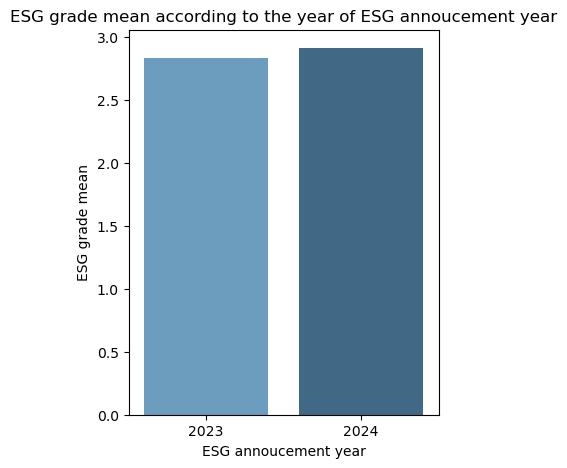

In [243]:
import matplotlib.pyplot as plt
import seaborn as sns

# barplot ÏãúÍ∞ÅÌôî
plt.figure(figsize=(4, 5))
sns.barplot(x="ÎÖÑÎèÑ", y="mean", data=esg_grouped, palette="Blues_d")
plt.xlabel('ESG annoucement year')
plt.ylabel('ESG grade mean')
plt.title('ESG grade mean according to the year of ESG annoucement year')
plt.show()

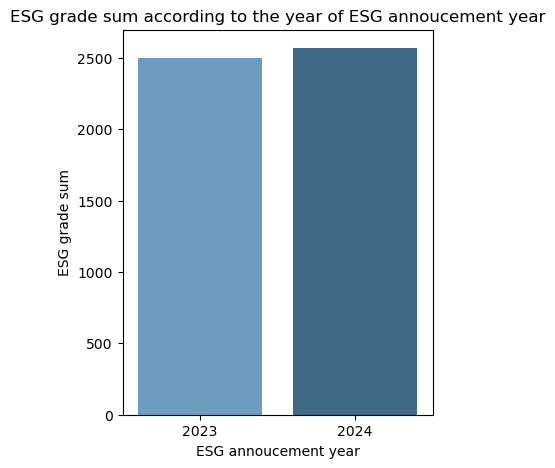

In [244]:
# barplot ÏãúÍ∞ÅÌôî
plt.figure(figsize=(4, 5))
sns.barplot(x="ÎÖÑÎèÑ", y="sum", data=esg_grouped, palette="Blues_d")
plt.xlabel('ESG annoucement year')
plt.ylabel('ESG grade sum')
plt.title('ESG grade sum according to the year of ESG annoucement year')
plt.show()

Ï†êÏ†ê ESG Ï§ëÏöîÏÑ±Ïù¥ Í∞ïÌöåÎê®Ïóê Îî∞ÎùºÏÑú 2023ÎÖÑÏóê ÎπÑÌï¥ÏÑú 2024ÎÖÑÏùò Ï†ÑÏ≤¥ Í∏∞ÏóÖÏùò ESG Îì±Í∏âÏùò ÌèâÍ∑†Í≥º Ìï©Ïù¥ <br>
ÏÜåÌè≠ ÏÉÅÏäπÌïú Í≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏßÄÎßå, ÌÅ∞ Ï∞®Ïù¥Îäî ÏóÜÎäî Í≤ÉÏúºÎ°ú ÌôïÏù∏ÎêúÎã§.

### Í∞Å E, S, G Ïó¥Î≥ÑÎ°ú ÎÖÑÎèÑÎ≥Ñ Ïñ¥Îäê Ï†ïÎèÑÎ°ú Îì±Í∏âÏùò Î≥ÄÌôîÍ∞Ä ÏûàÏóàÎäîÏßÄÎèÑ ÌôïÏù∏Ìï¥Î≥∏Îã§.

In [334]:
esg_environment_per_year = df_esg.groupby("ÎÖÑÎèÑ")["ÌôòÍ≤Ω"].agg(["mean", "sum"]).reset_index()
esg_social_per_year = df_esg.groupby("ÎÖÑÎèÑ")["ÏÇ¨Ìöå"].agg(["mean", "sum"]).reset_index()
esg_governance_per_year = df_esg.groupby("ÎÖÑÎèÑ")["ÏßÄÎ∞∞Íµ¨Ï°∞"].agg(["mean", "sum"]).reset_index()

In [336]:
esg_environment_per_year.head()

ÎÖÑÎèÑ      mean   sum
0  2023  2.872027  2536
1  2024  3.004530  2653

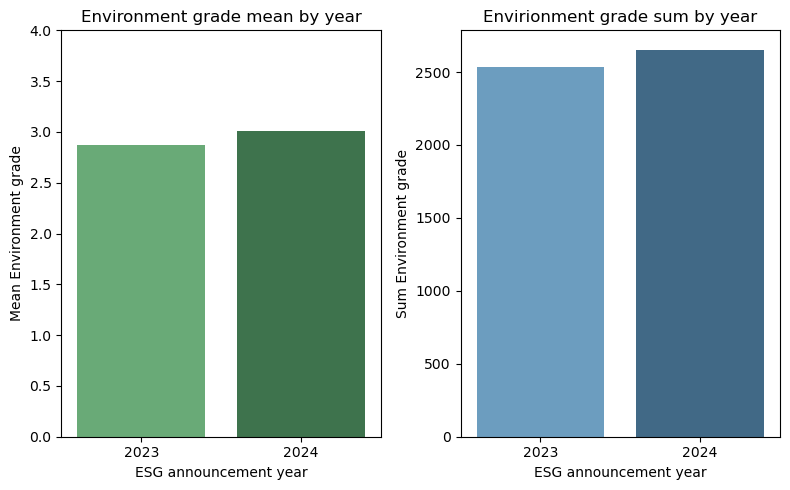

In [338]:
# 1Ìñâ 2Ïó¥Ïùò subplot ÏÉùÏÑ±
fig, axes = plt.subplots(1, 2, figsize=(8, 5))  # Í∞ÄÎ°úÎ°ú 2Í∞ú

# Ï≤´ Î≤àÏß∏ Í∑∏ÎûòÌîÑ: mean
sns.barplot(x="ÎÖÑÎèÑ", y="mean", data=esg_environment_per_year, palette="Greens_d", ax=axes[0])
axes[0].set_title("Environment grade mean by year")
axes[0].set_xlabel("ESG announcement year")
axes[0].set_ylabel("Mean Environment grade")
axes[0].set_ylim(0, 4)  # Ï†êÏàò Î≤îÏúÑ ÎßûÏ∂îÍ∏∞ (ÏÑ†ÌÉù)

# Îëê Î≤àÏß∏ Í∑∏ÎûòÌîÑ: sum
sns.barplot(x="ÎÖÑÎèÑ", y="sum", data=esg_environment_per_year, palette="Blues_d", ax=axes[1])
axes[1].set_title("Envirionment grade sum by year")
axes[1].set_xlabel("ESG announcement year")
axes[1].set_ylabel("Sum Environment grade")

# Í∑∏ÎûòÌîÑ Í∞Ñ Ïó¨Î∞± Ï°∞Ï†ï
plt.tight_layout()
plt.show()

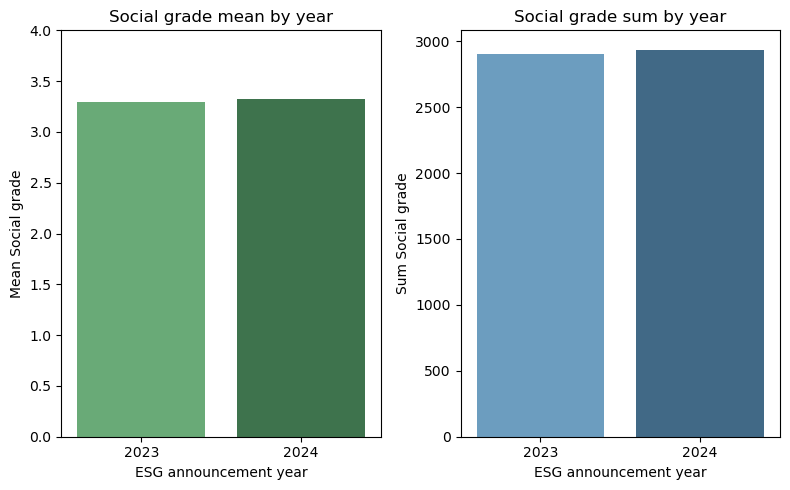

In [339]:
# 1Ìñâ 2Ïó¥Ïùò subplot ÏÉùÏÑ±
fig, axes = plt.subplots(1, 2, figsize=(8, 5))  # Í∞ÄÎ°úÎ°ú 2Í∞ú

# Ï≤´ Î≤àÏß∏ Í∑∏ÎûòÌîÑ: mean
sns.barplot(x="ÎÖÑÎèÑ", y="mean", data=esg_social_per_year, palette="Greens_d", ax=axes[0])
axes[0].set_title("Social grade mean by year")
axes[0].set_xlabel("ESG announcement year")
axes[0].set_ylabel("Mean Social grade")
axes[0].set_ylim(0, 4)  # Ï†êÏàò Î≤îÏúÑ ÎßûÏ∂îÍ∏∞ (ÏÑ†ÌÉù)

# Îëê Î≤àÏß∏ Í∑∏ÎûòÌîÑ: sum
sns.barplot(x="ÎÖÑÎèÑ", y="sum", data=esg_social_per_year, palette="Blues_d", ax=axes[1])
axes[1].set_title("Social grade sum by year")
axes[1].set_xlabel("ESG announcement year")
axes[1].set_ylabel("Sum Social grade")

# Í∑∏ÎûòÌîÑ Í∞Ñ Ïó¨Î∞± Ï°∞Ï†ï
plt.tight_layout()
plt.show()

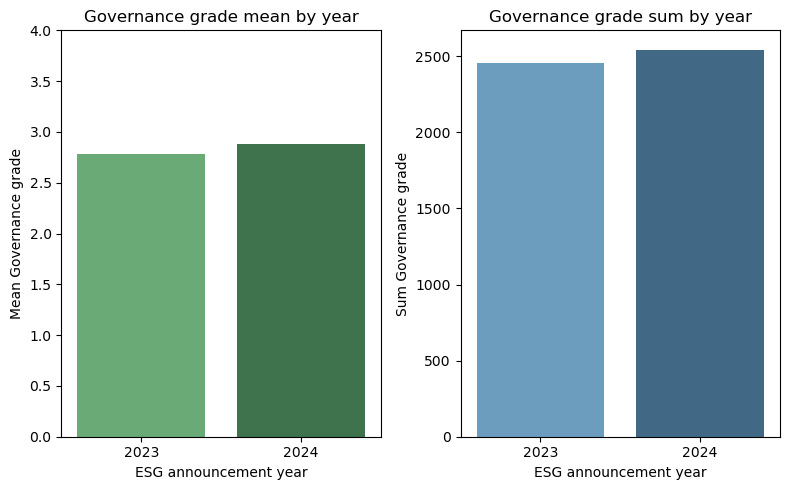

In [340]:
# 1Ìñâ 2Ïó¥Ïùò subplot ÏÉùÏÑ±
fig, axes = plt.subplots(1, 2, figsize=(8, 5))  # Í∞ÄÎ°úÎ°ú 2Í∞ú

# Ï≤´ Î≤àÏß∏ Í∑∏ÎûòÌîÑ: mean
sns.barplot(x="ÎÖÑÎèÑ", y="mean", data=esg_governance_per_year, palette="Greens_d", ax=axes[0])
axes[0].set_title("Governance grade mean by year")
axes[0].set_xlabel("ESG announcement year")
axes[0].set_ylabel("Mean Governance grade")
axes[0].set_ylim(0, 4)  # Ï†êÏàò Î≤îÏúÑ ÎßûÏ∂îÍ∏∞ (ÏÑ†ÌÉù)

# Îëê Î≤àÏß∏ Í∑∏ÎûòÌîÑ: sum
sns.barplot(x="ÎÖÑÎèÑ", y="sum", data=esg_governance_per_year, palette="Blues_d", ax=axes[1])
axes[1].set_title("Governance grade sum by year")
axes[1].set_xlabel("ESG announcement year")
axes[1].set_ylabel("Sum Governance grade")

# Í∑∏ÎûòÌîÑ Í∞Ñ Ïó¨Î∞± Ï°∞Ï†ï
plt.tight_layout()
plt.show()

In [347]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ìï≠Î™© Î¶¨Ïä§Ìä∏
categories = ["ÌôòÍ≤Ω", "ÏÇ¨Ìöå", "ÏßÄÎ∞∞Íµ¨Ï°∞"]
category_names = {"ÌôòÍ≤Ω": "Environment", "ÏÇ¨Ìöå": "Social", "ÏßÄÎ∞∞Íµ¨Ï°∞": "Governance"}

# Í≤∞Í≥º Ï†ÄÏû• ÎîïÏÖîÎÑàÎ¶¨
change_results = {}

# Ïπ¥ÌÖåÍ≥†Î¶¨Î≥ÑÎ°ú Ïó∞ÎèÑÎ≥Ñ ÌèâÍ∑†, Ìï©Í≥Ñ Î∞è Î≥ÄÌôîÏú® Í≥ÑÏÇ∞
for col in categories:
    df = df_esg.groupby("ÎÖÑÎèÑ")[col].agg(["mean", "sum"]).reset_index()
    df["mean_pct_change"] = df["mean"].pct_change() * 100
    df["sum_pct_change"] = df["sum"].pct_change() * 100
    change_results[col] = df

# Ï∂úÎ†•
print("‚úÖ ESG Ìï≠Î™©Î≥Ñ Ïó∞ÎèÑÎ≥Ñ ÌèâÍ∑† Î∞è Ìï©Í≥Ñ Î≥ÄÌôîÏú® (%):")
for col in categories:
    df = change_results[col]
    print(f"\nüîπ {category_names[col]}")
    for idx, row in df.iterrows():
        if idx == 0:
            print(f"{int(row['ÎÖÑÎèÑ'])}ÎÖÑ: Í∏∞Ï§Ä Ïó∞ÎèÑ")
        else:
            print(f"{int(row['ÎÖÑÎèÑ'])}ÎÖÑ: ÌèâÍ∑† Î≥ÄÌôîÏú® = {row['mean_pct_change']:.2f}%, Ìï©Í≥Ñ Î≥ÄÌôîÏú® = {row['sum_pct_change']:.2f}%")


‚úÖ ESG Ìï≠Î™©Î≥Ñ Ïó∞ÎèÑÎ≥Ñ ÌèâÍ∑† Î∞è Ìï©Í≥Ñ Î≥ÄÌôîÏú® (%):

üîπ Environment
2023ÎÖÑ: Í∏∞Ï§Ä Ïó∞ÎèÑ
2024ÎÖÑ: ÌèâÍ∑† Î≥ÄÌôîÏú® = 4.61%, Ìï©Í≥Ñ Î≥ÄÌôîÏú® = 4.61%

üîπ Social
2023ÎÖÑ: Í∏∞Ï§Ä Ïó∞ÎèÑ
2024ÎÖÑ: ÌèâÍ∑† Î≥ÄÌôîÏú® = 1.00%, Ìï©Í≥Ñ Î≥ÄÌôîÏú® = 1.00%

üîπ Governance
2023ÎÖÑ: Í∏∞Ï§Ä Ïó∞ÎèÑ
2024ÎÖÑ: ÌèâÍ∑† Î≥ÄÌôîÏú® = 3.67%, Ìï©Í≥Ñ Î≥ÄÌôîÏú® = 3.67%


2023ÎÖÑÍ≥º 2024ÎÖÑ ESG Îì±Í∏â Î≥ÄÌôîÎ•º Î∂ÑÏÑùÌïú Í≤∞Í≥º,
ÏÑ∏ Î∂ÑÏïº Î™®Îëê ÌèâÍ∑† Îì±Í∏âÏù¥ ÏÉÅÏäπÌïú Í≤ÉÏúºÎ°ú ÎÇòÌÉÄÎÇ¨Îã§.<br>
ÌäπÌûà ÌôòÍ≤Ω(Environment) Î∂ÑÏïºÎäî 4.61%Î°ú Í∞ÄÏû• ÎÜíÏùÄ ÏÉÅÏäπÎ•†ÏùÑ Í∏∞Î°ùÌñàÏúºÎ©∞,
Í∑∏Îã§ÏùåÏùÄ ÏßÄÎ∞∞Íµ¨Ï°∞(Governance) 3.67%, ÏÇ¨Ìöå(Social) 1.00% ÏàúÏù¥ÏóàÎã§.<br>
Ïù¥Îü¨Ìïú Ï∞®Ïù¥Îäî Í∞Å ESG Ìï≠Î™©Ïùò ÎÇ¥Ïû¨Ï†Å ÌäπÏÑ± Ï∞®Ïù¥Î•º Î∞òÏòÅÌïú Í≤ÉÏúºÎ°ú Ìï¥ÏÑùÎêúÎã§.<br><br>

ÌôòÍ≤Ω(E) Ìï≠Î™©ÏùÄ Ïò®Ïã§Í∞ÄÏä§ Î∞∞Ï∂úÎüâ, Ïû¨ÌôúÏö©Î•† Îì± Ï†ïÎüâÏ†Å ÏßÄÌëúÎ•º Ï§ëÏã¨ÏúºÎ°ú ÌèâÍ∞ÄÎêòÎØÄÎ°ú,
Í¥ÄÎ¶¨ÏôÄ Í∞úÏÑ†Ïù¥ ÏÉÅÎåÄÏ†ÅÏúºÎ°ú Ïö©Ïù¥ÌïòÍ≥†, Îã®Í∏∞Í∞Ñ ÎÇ¥ Îì±Í∏â Ìñ•ÏÉÅÏù¥ Í∞ÄÎä•Ìïú Íµ¨Ï°∞Î•º Í∞ñÎäîÎã§.<br>
ÏßÄÎ∞∞Íµ¨Ï°∞(Governance)Îäî Ïù¥ÏÇ¨Ìöå Íµ¨ÏÑ±, Í∞êÏÇ¨Ï†úÎèÑ Îì± Ï†úÎèÑ Í∏∞Î∞ò ÏöîÏÜåÎ°ú Íµ¨ÏÑ±ÎêòÏñ¥ ÏûàÏñ¥
Íµ¨Ï°∞Ï†Å Í∞úÌé∏ÏùÑ ÌÜµÌï¥ Ï†êÏßÑÏ†ÅÏù∏ Í∞úÏÑ†Ïù¥ Í∞ÄÎä•Ìïú Î∂ÑÏïºÎã§.<br>
Î∞òÎ©¥ ÏÇ¨Ìöå(Social) Ìï≠Î™©ÏùÄ ÎÖ∏Îèô, ÏïàÏ†Ñ, Ïù∏Í∂å, Îã§ÏñëÏÑ±, Ïú§Î¶¨ Îì±
Ï†ïÏÑ±Ï†Å ÏöîÏÜåÍ∞Ä ÎßéÏïÑ Í∞úÏÑ† ÏÜçÎèÑÍ∞Ä ÎäêÎ¶¨Í≥†,
ÌäπÌûà Ï§ëÎåÄÏû¨Ìï¥Ï≤òÎ≤åÎ≤ï ÏãúÌñâ Ïù¥ÌõÑ ÎÖ∏Îèô Í¥ÄÎ†® ÌèâÍ∞Ä Í∏∞Ï§ÄÏù¥ ÎçîÏö± ÏóÑÍ≤©Ìï¥ÏßÄÎ©¥ÏÑú
Îì±Í∏â ÏÉÅÏäπ Ìè≠Ïù¥ Ï†úÌïúÎêú Í≤ÉÏúºÎ°ú Î≥¥Ïù∏Îã§.<br>

Ï¶â, Î™®Îì† Î∂ÑÏïºÏóêÏÑú Îì±Í∏âÏùÄ ÏÉÅÏäπÌñàÏßÄÎßå,
Í∑∏ Ìè≠Ïùò Ï∞®Ïù¥Îäî Í∞Å ÏöîÏÜåÏùò Ï∏°Ï†ï Íµ¨Ï°∞ÏôÄ Í∞úÏÑ† Ïö©Ïù¥ÏÑ±Ïùò Ï∞®Ïù¥Î•º Ïûò Î≥¥Ïó¨Ï§ÄÎã§.

Ïù¥Îü¨Ìïú Í≤∞Í≥ºÎäî ESG Í≤ΩÏòÅÏóê ÏûàÏñ¥ Ìï≠Î™©Î≥Ñ Ï†ÑÎûµÏ†Å Ï†ëÍ∑ºÏù¥ ÌïÑÏöîÌï®ÏùÑ ÏãúÏÇ¨ÌïúÎã§.
ÌôòÍ≤ΩÍ≥º ÏßÄÎ∞∞Íµ¨Ï°∞Îäî Îã®Í∏∞Ï†ÅÏù∏ ÏÑ±Í≥º Í∞úÏÑ†Ïù¥ Í∞ÄÎä•ÌïòÍ≥†,
Ïô∏Î∂Ä ÌèâÍ∞ÄÏóêÎèÑ Îπ†Î•¥Í≤å Î∞òÏùëÌïòÎäî ÌäπÏÑ±ÏùÑ ÏßÄÎãàÎØÄÎ°ú
Í∏∞ÏóÖ ÏûÖÏû•ÏóêÏÑú Îã®Í∏∞ ESG ÏÑ±Í≥º Ï†úÍ≥†Ïùò Ï£ºÏöî ÌÉÄÍπÉÏù¥ Îê† Ïàò ÏûàÎã§.

Î∞òÎ©¥, ÏÇ¨Ìöå Ìï≠Î™©ÏùÄ ÎÇÆÏùÄ ÏÉÅÏäπÎ•†Ïù¥ Îã®ÏàúÌïú ÏÑ±Í≥º Î∂ÄÏßÑÏù¥ ÏïÑÎãàÎùº
Ï†ïÏÑ±Ï†Å Î≥µÏû°ÏÑ±Í≥º ÌèâÍ∞Ä Í∏∞Ï§ÄÏùò ÏóÑÍ≤©ÏÑ±Ïóê Í∏∞Ïù∏Ìïú Í≤ÉÏûÑÏùÑ Í≥†Î†§Ìï¥Ïïº ÌïúÎã§.
Îî∞ÎùºÏÑú Ìï¥Îãπ ÏòÅÏó≠ÏùÄ ÏßÄÏÜçÍ∞ÄÎä•Ìïú Ï°∞ÏßÅÎ¨∏Ìôî Ï†ïÏ∞©Í≥º ÎÇ¥Î∂Ä ÏãúÏä§ÌÖú Í∞ïÌôîÎùºÎäî
Ï§ëÏû•Í∏∞Ï†Å Ï†ëÍ∑º Ï†ÑÎûµÏù¥ ÌïÑÏöîÌïú Î∂ÑÏïºÎã§.

ÏöîÏª®ÎåÄ, Í∏∞ÏóÖÏù¥ ESG ÌèâÍ∞ÄÏóêÏÑú Îã®Í∏∞ ÏÑ±Í≥ºÎ•º Î™©ÌëúÎ°ú Ìï† Í≤ΩÏö∞
ÌôòÍ≤Ω(E)Í≥º ÏßÄÎ∞∞Íµ¨Ï°∞(G)Ïóê Ïö∞ÏÑ†ÏàúÏúÑÎ•º Îëò Ïàò ÏûàÏßÄÎßå,
ÏÇ¨Ìöå(S) Ìï≠Î™©ÏùÄ ÏßÄÏÜçÍ∞ÄÎä•ÏÑ±Ïùò ÌïµÏã¨ Ï∂ïÏúºÎ°úÏÑú
Ïû•Í∏∞Ï†Å Í≤ΩÏüÅÎ†•ÏùÑ ÌôïÎ≥¥ÌïòÍ∏∞ ÏúÑÌïú Ï†ÑÎûµÏ†ÅÏù¥Í≥† ÏßÑÏ†ïÏÑ± ÏûàÎäî ÎåÄÏùëÏù¥ Î≥ëÌñâÎêòÏñ¥Ïïº ÌïúÎã§.

# ÏúÑ ÎÇ¥Ïö©ÏùÄ Í∞ÄÏÑ§ 2ÏóêÏÑú ÏÇ¨Ïö©ÌïúÎã§.

# Í∞ÄÏÑ§1: ESG Ï†êÏàòÏùò Î≥ÄÌôîÎäî Ìï¥Îãπ Í∏∞ÏóÖÏùò Ï£ºÍ∞ÄÏóê Ïú†ÏùòÎØ∏Ìïú ÏòÅÌñ•ÏùÑ ÎØ∏Ïπ† Í≤ÉÏù¥Îã§.

> ESG(ÌôòÍ≤Ω¬∑ÏÇ¨Ìöå¬∑ÏßÄÎ∞∞Íµ¨Ï°∞) Ï†êÏàòÎäî Í∏∞ÏóÖÏùò ÏßÄÏÜçÍ∞ÄÎä•ÏÑ±Í≥º Î¶¨Ïä§ÌÅ¨ Í¥ÄÎ¶¨ Ïó≠ÎüâÏùÑ Ï†ïÎüâÏ†ÅÏúºÎ°ú ÌèâÍ∞ÄÌïú ÏßÄÌëúÎ°ú,<br>
> ÏµúÍ∑º Í∏àÏúµÍ∏∞Í¥Ä, Í∏∞Í¥Ä Ìà¨ÏûêÏûê, ÏûêÏÇ∞Ïö¥Ïö©ÏÇ¨ Îì±ÏóêÏÑú Ï§ëÏöîÌïú Ìà¨Ïûê ÌåêÎã® Í∏∞Ï§ÄÏúºÎ°ú Í¥ëÎ≤îÏúÑÌïòÍ≤å ÌôúÏö©ÎêòÍ≥† ÏûàÎã§.<br>
> Î≥∏ Î∂ÑÏÑùÏóêÏÑúÎäî ESG Ï†êÏàòÏùò Î≥ÄÌôîÍ∞Ä Ïã§Ï†úÎ°ú Ï£ºÍ∞ÄÏóê ÎØ∏ÏπòÎäî ÏòÅÌñ•ÏùÑ Ïã§Ï¶ùÏ†ÅÏúºÎ°ú Í≤ÄÏ¶ùÌïòÍ≥†Ïûê ÌïúÎã§.<br>
> Íµ¨Ï≤¥Ï†ÅÏúºÎ°ú, ESG Îì±Í∏â Î∞úÌëúÏùº(2024ÎÖÑ 10Ïõî 25Ïùº)ÏùÑ Í∏∞Ï§ÄÏúºÎ°ú Ï†ÑÌõÑ 5Í±∞ÎûòÏùºÏùò Ï¢ÖÍ∞Ä ÌèâÍ∑†ÏùÑ ÎπÑÍµêÌïòÏó¨<br>
> Îì±Í∏âÏù¥ ÏÉÅÏäπ¬∑ÌïòÎùΩÌïú Í∏∞ÏóÖÎì§Ïùò Ï£ºÍ∞Ä Î∞òÏùëÏùÑ ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Î∂ÑÏÑùÌïúÎã§.<br>
>
> Ïù¥Î•º ÌÜµÌï¥ Îã§ÏùåÍ≥º Í∞ôÏùÄ ÌïµÏã¨ Ïù∏ÏÇ¨Ïù¥Ìä∏Î•º ÎèÑÏ∂úÌïòÍ≥†Ïûê ÌïúÎã§.<br>
>
> - ESG Ï†êÏàòÏùò Î≥ÄÎèôÏù¥ Îã®Í∏∞Ï†ÅÏúºÎ°ú Ï£ºÍ∞ÄÏóê ÏñºÎßàÎÇò ÏòÅÌñ•ÏùÑ ÎØ∏ÏπòÎäîÍ∞Ä?<br>
> - Îì±Í∏âÏù¥ ÏÉÅÏäπÌïú Í∏∞ÏóÖÏùÄ Ïã§Ï†úÎ°ú Ï£ºÍ∞ÄÍ∞Ä Ïö∞ÏÉÅÌñ•ÌïòÎäî Í≤ΩÌñ•Ïù¥ ÏûàÎäîÍ∞Ä?<br>
> - Î∞òÎåÄÎ°ú, Îì±Í∏âÏù¥ ÌïòÎùΩÌïú Í∏∞ÏóÖÏùÄ Î∂ÄÏ†ïÏ†Å ÏãúÏû• Î∞òÏùë(Ï£ºÍ∞Ä ÌïòÎùΩ)ÏùÑ Í≤™ÎäîÍ∞Ä?<br>
>
> ÎÇòÏïÑÍ∞Ä, ESG Îì±Í∏â Í¥ÄÎ¶¨Îäî Í∏∞ÏóÖÍ∞ÄÏπò Ï†úÍ≥†Ïùò Ïã§ÏßàÏ†Å ÏàòÎã®Ïù¥ Îê† Ïàò ÏûàÎäîÏßÄ,<br>
> Í∑∏Î¶¨Í≥† ESG Ï†ïÎ≥¥Í≥µÏãúÏùò Ï†ÑÎûµÏ†Å Ï§ëÏöîÏÑ±Ïóê ÎåÄÌï¥ Ï†ïÎüâ Í∏∞Î∞òÏúºÎ°ú Ìï¥ÏÑùÌïòÍ≥†Ïûê ÌïúÎã§.

Î®ºÏ†Ä ESG Îì±Í∏âÏù¥ ÏÉÅÏäπÌïú Í∏∞ÏóÖÍ≥º ÌïòÎùΩÌïú Í∏∞ÏóÖÎì§ÏùÑ ÌôïÏù∏ÌïòÍ≥† Ìï¥Îãπ Í∏∞ÏóÖÎì§ÏùÑ 2Í∞úÏùò Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑÏúºÎ°ú Î∂ÑÎ¶¨ÌïúÎã§.<br>
Ïù¥ÌõÑ Í∏∞ÏóÖÎ™ÖÏù¥ ÎÖÑÎèÑÎ≥ÑÎ°ú ÎÇòÎàÑÏñ¥Ï†∏ ÏûàÏúºÎØÄÎ°ú Ï§ëÎ≥µÎêú Í∏∞ÏóÖÎ™ÖÏùÑ ÌïòÎÇòÎ°ú Ï§ÑÏù∏Îã§.<br>

In [359]:
df_esg.head()

Í∏∞ÏóÖÎ™Ö  ESGÎì±Í∏â  ÌôòÍ≤Ω  ÏÇ¨Ìöå  ÏßÄÎ∞∞Íµ¨Ï°∞    ÎÖÑÎèÑ  ESG Îì±Í∏â Î∞úÌëú Ï†Ñ  ESG Îì±Í∏â Î∞úÌëú ÌõÑ  Ï¢ÖÍ∞Ä Î≥ÄÌôîÏú®(%)
0  AJÎÑ§Ìä∏ÏõçÏä§      4   2   5     4  2023       4836.0       4893.0       1.18
1  AJÎÑ§Ìä∏ÏõçÏä§      4   2   5     4  2024       4836.0       4893.0       1.18
2   AKÌôÄÎî©Ïä§      5   5   6     4  2023      12840.0      12310.0      -4.13
3   AKÌôÄÎî©Ïä§      5   5   6     4  2024      12840.0      12310.0      -4.13
4     BGF      5   5   6     4  2023       3618.0       3573.0      -1.24

In [361]:
df_esg["Ï¢ÖÍ∞Ä Î≥ÄÌôîÏú®(%)"] = ((df_esg["ESG Îì±Í∏â Î∞úÌëú ÌõÑ"] - df_esg["ESG Îì±Í∏â Î∞úÌëú Ï†Ñ"]) 
                       / df_esg["ESG Îì±Í∏â Î∞úÌëú Ï†Ñ"]) * 100

df_esg["Ï¢ÖÍ∞Ä Î≥ÄÌôîÏú®(%)"] = df_esg["Ï¢ÖÍ∞Ä Î≥ÄÌôîÏú®(%)"].round(2)  # ÏÜåÏàò ÎëòÏß∏ ÏûêÎ¶¨ÍπåÏßÄ

In [363]:
df_esg.head()

Í∏∞ÏóÖÎ™Ö  ESGÎì±Í∏â  ÌôòÍ≤Ω  ÏÇ¨Ìöå  ÏßÄÎ∞∞Íµ¨Ï°∞    ÎÖÑÎèÑ  ESG Îì±Í∏â Î∞úÌëú Ï†Ñ  ESG Îì±Í∏â Î∞úÌëú ÌõÑ  Ï¢ÖÍ∞Ä Î≥ÄÌôîÏú®(%)
0  AJÎÑ§Ìä∏ÏõçÏä§      4   2   5     4  2023       4836.0       4893.0       1.18
1  AJÎÑ§Ìä∏ÏõçÏä§      4   2   5     4  2024       4836.0       4893.0       1.18
2   AKÌôÄÎî©Ïä§      5   5   6     4  2023      12840.0      12310.0      -4.13
3   AKÌôÄÎî©Ïä§      5   5   6     4  2024      12840.0      12310.0      -4.13
4     BGF      5   5   6     4  2023       3618.0       3573.0      -1.24

In [365]:
# 2023ÎÖÑÍ≥º 2024ÎÖÑ Îç∞Ïù¥ÌÑ∞Î•º ÎÇòÎàî
df_2023 = df_esg[df_esg["ÎÖÑÎèÑ"] == 2023].copy()
df_2024 = df_esg[df_esg["ÎÖÑÎèÑ"] == 2024].copy()

# Í∏∞ÏóÖÎ™Ö Í∏∞Ï§ÄÏúºÎ°ú Î≥ëÌï© (2023 vs 2024 ÎπÑÍµêÏö©)
df_compare = pd.merge(df_2023[["Í∏∞ÏóÖÎ™Ö", "ESGÎì±Í∏â"]], 
                      df_2024[["Í∏∞ÏóÖÎ™Ö", "ESGÎì±Í∏â"]], 
                      on="Í∏∞ÏóÖÎ™Ö", suffixes=("_2023", "_2024"))

# Î≥ÄÌôîÎüâ Ïó¥ Ï∂îÍ∞Ä
df_compare["Îì±Í∏âÎ≥ÄÌôî"] = df_compare["ESGÎì±Í∏â_2024"] - df_compare["ESGÎì±Í∏â_2023"]

# Ï¢ÖÍ∞Ä Î≥ÄÌôîÏú®Îßå Îî∞Î°ú Ï∂îÏ∂ú
change_col = df_esg[df_esg["ÎÖÑÎèÑ"] == 2024][["Í∏∞ÏóÖÎ™Ö", "Ï¢ÖÍ∞Ä Î≥ÄÌôîÏú®(%)"]].copy()

# Í∏∞ÏóÖÎ™ÖÏùÑ Í∏∞Ï§ÄÏúºÎ°ú Î≥ëÌï©
df_compare = df_compare.merge(change_col, on="Í∏∞ÏóÖÎ™Ö", how="left")

# Îì±Í∏â ÏÉÅÏäπ / ÌïòÎùΩ Í∏∞ÏóÖ Î∂ÑÎ¶¨
df_grade_increase = df_compare[df_compare["Îì±Í∏âÎ≥ÄÌôî"] > 0]
df_grade_decrease = df_compare[df_compare["Îì±Í∏âÎ≥ÄÌôî"] < 0]


In [367]:
df_compare.head()

Í∏∞ÏóÖÎ™Ö  ESGÎì±Í∏â_2023  ESGÎì±Í∏â_2024  Îì±Í∏âÎ≥ÄÌôî  Ï¢ÖÍ∞Ä Î≥ÄÌôîÏú®(%)
0   AJÎÑ§Ìä∏ÏõçÏä§           4           4     0       1.18
1    AKÌôÄÎî©Ïä§           5           5     0      -4.13
2      BGF           5           5     0      -1.24
3   BGFÎ¶¨ÌÖåÏùº           5           5     0      -0.25
4  BNKÍ∏àÏúµÏßÄÏ£º           5           5     0       0.58

In [369]:
df_grade_increase

Í∏∞ÏóÖÎ™Ö  ESGÎì±Í∏â_2023  ESGÎì±Í∏â_2024  Îì±Í∏âÎ≥ÄÌôî  Ï¢ÖÍ∞Ä Î≥ÄÌôîÏú®(%)
8        CJ ENM           4           5     1       0.06
9    CJ Î∞îÏù¥Ïò§ÏÇ¨Ïù¥Ïñ∏Ïä§           2           4     2      -7.60
22          DSR           1           2     1      -3.90
25          F&F           4           5     1      -3.96
26          GKL           4           5     1       1.56
..          ...         ...         ...   ...        ...
850       ÌòÑÎåÄÏù¥ÏßÄÏõ∞           5           6     1       6.63
858       ÌòÑÎåÄÌôàÏáºÌïë           5           6     1      -0.65
863      ÌôîÏäπÏïåÏï§ÏóêÏù¥           3           4     1      -6.57
865     ÌôîÏäπÏΩîÌçºÎ†àÏù¥ÏÖò           3           4     1      -0.77
879         Ìú¥Ïò®Ïä§           3           5     2      -4.93

[187 rows x 5 columns]

In [371]:
df_grade_increase.info()

<class 'pandas.core.frame.DataFrame'>
Index: 187 entries, 8 to 879
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Í∏∞ÏóÖÎ™Ö         187 non-null    object 
 1   ESGÎì±Í∏â_2023  187 non-null    int64  
 2   ESGÎì±Í∏â_2024  187 non-null    int64  
 3   Îì±Í∏âÎ≥ÄÌôî        187 non-null    int64  
 4   Ï¢ÖÍ∞Ä Î≥ÄÌôîÏú®(%)   187 non-null    float64
dtypes: float64(1), int64(3), object(1)
memory usage: 8.8+ KB


In [373]:
df_grade_increase.describe()

ESGÎì±Í∏â_2023  ESGÎì±Í∏â_2024        Îì±Í∏âÎ≥ÄÌôî   Ï¢ÖÍ∞Ä Î≥ÄÌôîÏú®(%)
count  187.000000  187.000000  187.000000  187.000000
mean     2.577540    3.770053    1.192513   -0.708717
std      1.310884    1.305720    0.408706    5.636135
min      1.000000    2.000000    1.000000  -12.820000
25%      1.000000    2.500000    1.000000   -3.115000
50%      2.000000    4.000000    1.000000   -1.350000
75%      4.000000    5.000000    1.000000    0.440000
max      5.000000    6.000000    3.000000   45.490000

Îì±Í∏âÏù¥ ÏÉÅÏäπÌïú Í∏∞ÏóÖÏùÄ 187Í∞úÏùò Í∏∞ÏóÖÏù¥ ÏûàÏúºÎ©∞ ÌèâÍ∑†Ï†ÅÏúºÎ°ú 1.7Ï†ïÎèÑÏùò ÏÉÅÏäπÏùÑ ÌïòÏòÄÎã§.<br>
ÏµúÎåÄÎ°úÎäî 4Ï†ïÎèÑÎ°ú ÎÜíÍ≤å Îì±Í∏âÏù¥ ÏÉÅÏäπÌïòÏòÄÎã§.

In [376]:
df_grade_decrease

Í∏∞ÏóÖÎ™Ö  ESGÎì±Í∏â_2023  ESGÎì±Í∏â_2024  Îì±Í∏âÎ≥ÄÌôî  Ï¢ÖÍ∞Ä Î≥ÄÌôîÏú®(%)
17      DBÌïòÏù¥ÌÖç           4           2    -2      -2.07
31        HDC           4           2    -2       0.18
37   HDÌòÑÎåÄÍ±¥ÏÑ§Í∏∞Í≥Ñ           6           5    -1      -7.20
48    HLBÏÉùÎ™ÖÍ≥ºÌïô           3           2    -1      -3.12
58   JYP Ent.           4           3    -1      -2.50
..        ...         ...         ...   ...        ...
873     Ìö®ÏÑ±Ï§ëÍ≥µÏóÖ           5           4    -1       0.20
874     Ìö®ÏÑ±Ìã∞Ïï§Ïî®           5           4    -1       0.56
876        ÌõÑÏÑ±           4           3    -1      -0.23
877       Ìú¥ÎπÑÏä§           5           4    -1      -4.92
880        Ìú¥Ï†§           3           2    -1      -4.03

[142 rows x 5 columns]

In [378]:
df_grade_decrease.info()

<class 'pandas.core.frame.DataFrame'>
Index: 142 entries, 17 to 880
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Í∏∞ÏóÖÎ™Ö         142 non-null    object 
 1   ESGÎì±Í∏â_2023  142 non-null    int64  
 2   ESGÎì±Í∏â_2024  142 non-null    int64  
 3   Îì±Í∏âÎ≥ÄÌôî        142 non-null    int64  
 4   Ï¢ÖÍ∞Ä Î≥ÄÌôîÏú®(%)   142 non-null    float64
dtypes: float64(1), int64(3), object(1)
memory usage: 6.7+ KB


In [380]:
df_grade_decrease.describe()

ESGÎì±Í∏â_2023  ESGÎì±Í∏â_2024        Îì±Í∏âÎ≥ÄÌôî   Ï¢ÖÍ∞Ä Î≥ÄÌôîÏú®(%)
count  142.000000  142.000000  142.000000  142.000000
mean     3.225352    2.169014   -1.056338   -0.850986
std      1.390925    1.373363    0.231390    3.272755
min      2.000000    1.000000   -2.000000   -9.710000
25%      2.000000    1.000000   -1.000000   -2.575000
50%      3.000000    2.000000   -1.000000   -0.935000
75%      4.000000    3.000000   -1.000000    0.560000
max      6.000000    5.000000   -1.000000   12.950000

Îì±Í∏âÏù¥ ÌïòÎùΩÌïú Í∏∞ÏóÖÏùÄ 142Í∞úÏùò Í∏∞ÏóÖÏù¥ ÏûàÏúºÎ©∞ ÌèâÍ∑†Ï†ÅÏúºÎ°ú -1.7Ï†ïÎèÑÏùò ÌïòÎùΩÏùÑ ÌïòÏòÄÎã§.<br>
ÏµúÎåÄÎ°úÎäî -3Ï†ïÎèÑÎ°ú ÎÜíÍ≤å Îì±Í∏âÏù¥ ÌïòÎùΩÌïòÏòÄÎã§.

Ïù¥Ï†ú T testÎ•º ÌÜµÌï¥ÏÑú Îëê Í∑∏Î£πÍ∞ÑÏóê Ïú†ÏùòÎØ∏ÌïòÍ≤å Ï£ºÍ∞ÄÏùò Î≥ÄÌôîÏóê Ï∞®Ïù¥Í∞Ä ÏûàÎäîÏßÄÎ•º ÌôïÏù∏Ìï¥Î≥º Í≤ÉÏù¥Îã§.

In [384]:
from scipy.stats import ttest_ind

# Welch‚Äôs t-test (unequal variances) Îëê ÏßëÎã®Ïùò ÏÉòÌîå ÏàòÍ∞Ä Îã§Î•¥Í∏∞Ïóê Welch's t-testÎ•º ÏÇ¨Ïö©ÌïòÏòÄÎã§.
t_stat, p_value = ttest_ind(df_grade_increase['Ï¢ÖÍ∞Ä Î≥ÄÌôîÏú®(%)'], df_grade_decrease['Ï¢ÖÍ∞Ä Î≥ÄÌôîÏú®(%)'], equal_var=False)

print(f"t-statistic: {t_stat:.3f}, p-value: {p_value:.4f}")

t-statistic: 0.287, p-value: 0.7741


In [386]:
print("ÏÉÅÏäπ Í∑∏Î£π Ïàò:", len(df_grade_increase))
print("ÌïòÎùΩ Í∑∏Î£π Ïàò:", len(df_grade_decrease))


ÏÉÅÏäπ Í∑∏Î£π Ïàò: 187
ÌïòÎùΩ Í∑∏Î£π Ïàò: 142


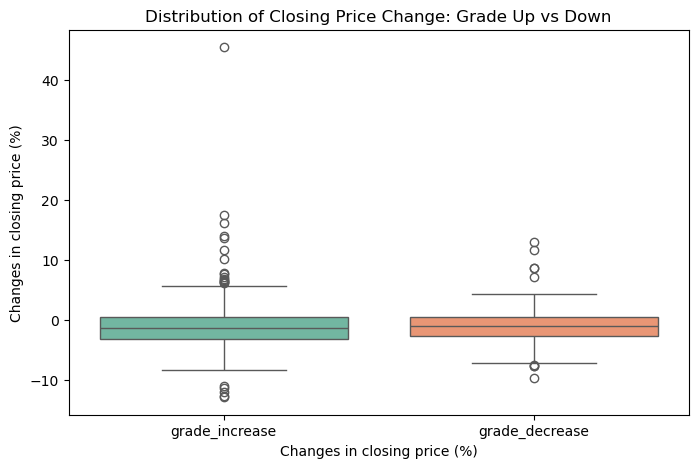

t-statistic: 0.287, p-value: 0.7741


In [388]:
import pandas as pd

# Í∞Å ÏãúÎ¶¨Ï¶àÏóê Í∑∏Î£π ÎùºÎ≤® Î∂ÄÏó¨
increase = df_grade_increase[['Í∏∞ÏóÖÎ™Ö', 'Ï¢ÖÍ∞Ä Î≥ÄÌôîÏú®(%)']].copy()
increase['Îì±Í∏âÎ≥ÄÌôî'] = 'Îì±Í∏â ÏÉÅÏäπ'

decrease = df_grade_decrease[['Í∏∞ÏóÖÎ™Ö', 'Ï¢ÖÍ∞Ä Î≥ÄÌôîÏú®(%)']].copy()
decrease['Îì±Í∏âÎ≥ÄÌôî'] = 'Îì±Í∏â ÌïòÎùΩ'

df_box = pd.concat([increase, decrease])

# Î∞ïÏä§ÌîåÎ°Ø (long-format)
plt.figure(figsize=(8, 5))
sns.boxplot(x='Îì±Í∏âÎ≥ÄÌôî', y='Ï¢ÖÍ∞Ä Î≥ÄÌôîÏú®(%)', data=df_box, palette="Set2")
plt.title('Distribution of Closing Price Change: Grade Up vs Down')
plt.xticks([0, 1], ['grade_increase', 'grade_decrease'])
plt.xlabel("Changes in closing price (%)")
plt.ylabel("Changes in closing price (%)")
plt.show()

print(f"t-statistic: {t_stat:.3f}, p-value: {p_value:.4f}")

ESG Îì±Í∏âÏù¥ ÏÉÅÏäπÌïú Í∏∞ÏóÖÍµ∞Í≥º ÌïòÎùΩÌïú Í∏∞ÏóÖÍµ∞ Í∞ÑÏùò Ï¢ÖÍ∞Ä Î≥ÄÌôîÏú®ÏùÑ ÎπÑÍµêÌïú Í≤∞Í≥º,
Îëê ÏßëÎã®Ïùò ÌèâÍ∑†Í∞íÏùÄ ÏãúÍ∞ÅÏ†ÅÏúºÎ°ú Ïú†ÏùòÎØ∏Ìïú Ï∞®Ïù¥Î•º Î≥¥Ïù¥ÏßÄ ÏïäÏïòÎã§.<br>
Ï∂îÍ∞ÄÎ°ú ÏàòÌñâÌïú Welch's t-testÏóêÏÑúÎèÑ p-valueÍ∞Ä 0.7741Î°ú Ïú†ÏùòÏàòÏ§Ä 0.05Î•º ÌÅ¨Í≤å Ï¥àÍ≥ºÌïòÏó¨,
Îëê ÏßëÎã® Í∞Ñ Ï¢ÖÍ∞Ä Î≥ÄÌôîÏú®Ïùò ÌèâÍ∑† Ï∞®Ïù¥Í∞Ä ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÎØ∏ÌïòÏßÄ ÏïäÏùåÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏóàÎã§.<br>

Ïù¥Îäî ESG Îì±Í∏âÏùò Îã®Í∏∞ Î≥ÄÎèôÏù¥ Ìà¨ÏûêÏûêÎì§Ïùò Ï£ºÍ∞Ä Î∞òÏùëÏóê Ï¶âÍ∞ÅÏ†ÅÏù¥Í≥† Í≤∞Ï†ïÏ†ÅÏù∏ ÏòÅÌñ•ÏùÑ ÎØ∏ÏπòÏßÄ ÏïäÏïòÏùåÏùÑ ÏãúÏÇ¨ÌïúÎã§.
Ïã§Ï†úÎ°ú ESG Ï†ïÎ≥¥Îäî Í∑∏ ÌäπÏÑ±ÏÉÅ Ïû•Í∏∞Ï†Å ÏßÄÏÜçÍ∞ÄÎä•ÏÑ±Ïùò Ï≤ôÎèÑÎ°ú Í∞ÑÏ£ºÎêòÎ©∞,<br>
Ìà¨ÏûêÏûêÎì§Ïù¥ Ïù¥Î•º Î∞òÏòÅÌïòÎäî ÏãúÏ†êÍ≥º Î∞©ÏãùÏùÄ ÏÇ∞ÏóÖÍµ∞Î≥Ñ, Ï†ïÎ≥¥Í≥µÏãú Ï±ÑÎÑê, ÏãúÏû• ÏÉÅÌô© Îì±Ïóê Îî∞Îùº Îã¨ÎùºÏßà Ïàò ÏûàÎã§.

ÎòêÌïú ESG Îì±Í∏â ÏûêÏ≤¥Í∞Ä Îì±Í∏âÌèâÍ∞ÄÍ∏∞Í¥ÄÏùò ÎÇ¥Î∂Ä Í∏∞Ï§ÄÏóê Îî∞Îùº ÏÉÅÎåÄÌèâÍ∞Ä ÎòêÎäî Ï†ïÏÑ±Ï†Å ÏöîÏÜåÏóê ÏùòÌï¥ Î∂ÄÏó¨ÎêòÍ∏∞ ÎïåÎ¨∏Ïóê,<br>
Ïã§Ï†ú ÏãúÏû• Ï∞∏Ïó¨ÏûêÎì§ ÏÇ¨Ïù¥ÏóêÏÑú Îì±Í∏â Î≥ÄÎèôÏùò Ïã†Î¢∞ÎèÑÎÇò ÎØºÍ∞êÎèÑÍ∞Ä Ï∂©Î∂ÑÌûà ÌôïÎ≥¥ÎêòÏßÄ ÏïäÏïòÏùÑ Í∞ÄÎä•ÏÑ±ÎèÑ Ï°¥Ïû¨ÌïúÎã§.

ÏöîÏïΩÌïòÏûêÎ©¥, Îã®Í∏∞ ÏãúÍ≥ÑÏó¥ Í∏∞Ï§ÄÏùò ESG Îì±Í∏â Î≥ÄÌôîÎäî Ï£ºÍ∞Ä Î≥ÄÌôîÏú®Í≥º Ïú†ÏùòÌïú ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎ•º Í∞ñÏßÄ ÏïäÏïòÎã§Îäî Î∂ÑÏÑù Í≤∞Í≥ºÎäî,<br>
ESG Îì±Í∏â ÏûêÏ≤¥Î≥¥Îã§ÎèÑ Ïñ¥ÎñªÍ≤å Í≥µÏãúÎêòÍ≥† Ìï¥ÏÑùÎêòÎ©∞, ÏãúÏû•Ïóê Ï†ÑÎã¨ÎêòÎäîÏßÄÏùò Îß•ÎùΩÏù¥ Ï§ëÏöîÌï®ÏùÑ Î≥¥Ïó¨Ï£ºÎäî ÏãúÏÇ¨Ï†êÏùÑ Ï†úÍ≥µÌïúÎã§.

In [390]:
increase

Í∏∞ÏóÖÎ™Ö  Ï¢ÖÍ∞Ä Î≥ÄÌôîÏú®(%)   Îì±Í∏âÎ≥ÄÌôî
8        CJ ENM       0.06  Îì±Í∏â ÏÉÅÏäπ
9    CJ Î∞îÏù¥Ïò§ÏÇ¨Ïù¥Ïñ∏Ïä§      -7.60  Îì±Í∏â ÏÉÅÏäπ
22          DSR      -3.90  Îì±Í∏â ÏÉÅÏäπ
25          F&F      -3.96  Îì±Í∏â ÏÉÅÏäπ
26          GKL       1.56  Îì±Í∏â ÏÉÅÏäπ
..          ...        ...    ...
850       ÌòÑÎåÄÏù¥ÏßÄÏõ∞       6.63  Îì±Í∏â ÏÉÅÏäπ
858       ÌòÑÎåÄÌôàÏáºÌïë      -0.65  Îì±Í∏â ÏÉÅÏäπ
863      ÌôîÏäπÏïåÏï§ÏóêÏù¥      -6.57  Îì±Í∏â ÏÉÅÏäπ
865     ÌôîÏäπÏΩîÌçºÎ†àÏù¥ÏÖò      -0.77  Îì±Í∏â ÏÉÅÏäπ
879         Ìú¥Ïò®Ïä§      -4.93  Îì±Í∏â ÏÉÅÏäπ

[187 rows x 3 columns]

In [392]:
df_box

Í∏∞ÏóÖÎ™Ö  Ï¢ÖÍ∞Ä Î≥ÄÌôîÏú®(%)   Îì±Í∏âÎ≥ÄÌôî
8        CJ ENM       0.06  Îì±Í∏â ÏÉÅÏäπ
9    CJ Î∞îÏù¥Ïò§ÏÇ¨Ïù¥Ïñ∏Ïä§      -7.60  Îì±Í∏â ÏÉÅÏäπ
22          DSR      -3.90  Îì±Í∏â ÏÉÅÏäπ
25          F&F      -3.96  Îì±Í∏â ÏÉÅÏäπ
26          GKL       1.56  Îì±Í∏â ÏÉÅÏäπ
..          ...        ...    ...
873       Ìö®ÏÑ±Ï§ëÍ≥µÏóÖ       0.20  Îì±Í∏â ÌïòÎùΩ
874       Ìö®ÏÑ±Ìã∞Ïï§Ïî®       0.56  Îì±Í∏â ÌïòÎùΩ
876          ÌõÑÏÑ±      -0.23  Îì±Í∏â ÌïòÎùΩ
877         Ìú¥ÎπÑÏä§      -4.92  Îì±Í∏â ÌïòÎùΩ
880          Ìú¥Ï†§      -4.03  Îì±Í∏â ÌïòÎùΩ

[329 rows x 3 columns]

## Í∞ÄÏÑ§ 2: ESG Îì±Í∏âÏóêÎäî E, S, G Ï§ë EÍ∞Ä Í∞ÄÏû• Îì±Í∏âÏùò Í≤∞Ï†ïÏóê Ï§ëÏöîÎèÑÍ∞Ä ÏûàÏùÑ Í≤ÉÏù¥Îã§. 
## ÏôúÎÉêÌïòÎ©¥ E ÏöîÏÜåÍ∞Ä Í∞ÄÏû• Í∏∞ÏóÖ Ï∞®ÏõêÏóêÏÑú Î≥ÄÌôîÎ•º Ï£ºÍ∏∞ Ï¢ãÏùÄ ÏöîÏÜåÏù¥Í∏∞ ÎïåÎ¨∏Ïù¥Îã§. 
## ÎçîÎ∂àÏñ¥ E, S, GÎ≥Ñ ÌäπÏÑ±Ïóê Îî∞ÎùºÏÑú Îì±Í∏â Î≥ÄÌôîÏñëÏÉÅÏóê Ï∞®Ïù¥Í∞Ä ÏûàÏùÑ Í≤ÉÏù¥Îã§.

In [401]:
df_esg.head()

Í∏∞ÏóÖÎ™Ö  ESGÎì±Í∏â  ÌôòÍ≤Ω  ÏÇ¨Ìöå  ÏßÄÎ∞∞Íµ¨Ï°∞    ÎÖÑÎèÑ  ESG Îì±Í∏â Î∞úÌëú Ï†Ñ  ESG Îì±Í∏â Î∞úÌëú ÌõÑ  Ï¢ÖÍ∞Ä Î≥ÄÌôîÏú®(%)
0  AJÎÑ§Ìä∏ÏõçÏä§      4   2   5     4  2023       4836.0       4893.0       1.18
1  AJÎÑ§Ìä∏ÏõçÏä§      4   2   5     4  2024       4836.0       4893.0       1.18
2   AKÌôÄÎî©Ïä§      5   5   6     4  2023      12840.0      12310.0      -4.13
3   AKÌôÄÎî©Ïä§      5   5   6     4  2024      12840.0      12310.0      -4.13
4     BGF      5   5   6     4  2023       3618.0       3573.0      -1.24

In [405]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# X: ÎèÖÎ¶Ω Î≥ÄÏàò / y: Ï¢ÖÏÜç Î≥ÄÏàò
X = df_esg[["ÌôòÍ≤Ω", "ÏÇ¨Ìöå", "ÏßÄÎ∞∞Íµ¨Ï°∞"]]
y = df_esg["ESGÎì±Í∏â"]  # Ïù¥ Í∞íÏùÄ Î∞òÎìúÏãú ÏàòÏπòÌòïÏù¥Ïñ¥Ïïº Ìï®! (Ïòà: A=5, B+=4, ..., C=1)

# ÏÑ†Ìòï ÌöåÍ∑Ä Î™®Îç∏ ÌïôÏäµ
model = LinearRegression().fit(X, y)

# ÏòàÏ∏°Í∞í ÏÉùÏÑ±
y_pred = model.predict(X)

# Í≤∞Í≥º Ï∂úÎ†•
print("ÌöåÍ∑ÄÍ≥ÑÏàò (Ï§ëÏöîÎèÑ):", model.coef_)
print("Ï†àÌé∏ (intercept):", model.intercept_)
print("ÏÑ§Î™ÖÎ†• (R^2 score):", r2_score(y, y_pred))


ÌöåÍ∑ÄÍ≥ÑÏàò (Ï§ëÏöîÎèÑ): [0.24616748 0.26154848 0.53869299]
Ï†àÌé∏ (intercept): -0.24343204256019035
ÏÑ§Î™ÖÎ†• (R^2 score): 0.9621009962998447


In [409]:
print(df_esg[["ESGÎì±Í∏â", "ÌôòÍ≤Ω", "ÏÇ¨Ìöå", "ÏßÄÎ∞∞Íµ¨Ï°∞"]].corr())

          ESGÎì±Í∏â        ÌôòÍ≤Ω        ÏÇ¨Ìöå      ÏßÄÎ∞∞Íµ¨Ï°∞
ESGÎì±Í∏â  1.000000  0.882972  0.900570  0.898957
ÌôòÍ≤Ω     0.882972  1.000000  0.891679  0.685461
ÏÇ¨Ìöå     0.900570  0.891679  1.000000  0.705641
ÏßÄÎ∞∞Íµ¨Ï°∞   0.898957  0.685461  0.705641  1.000000


In [411]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_esg[["ÌôòÍ≤Ω", "ÏÇ¨Ìöå", "ÏßÄÎ∞∞Íµ¨Ï°∞"]])

model_std = LinearRegression().fit(X_scaled, y)
print("ÌëúÏ§ÄÌôî ÌõÑ ÌöåÍ∑ÄÍ≥ÑÏàò:", model_std.coef_)
print("Ï†àÌé∏ (intercept):", model.intercept_)
print("ÏÑ§Î™ÖÎ†• (R^2 score):", r2_score(y, y_pred))print("Ï†àÌé∏ (intercept):", model.intercept_)
print("ÏÑ§Î™ÖÎ†• (R^2 score):", r2_score(y, y_pred))

ÌëúÏ§ÄÌôî ÌõÑ ÌöåÍ∑ÄÍ≥ÑÏàò: [0.39644321 0.50573292 0.7749102 ]


# ÏÑ†Ìòï ÌöåÍ∑Ä Î™®Îç∏ ÎßêÍ≥† ÎûúÎç§ Ìè¨Î†àÏä§Ìä∏ ÌöåÍ∑Ä Î™®Îç∏Î°úÎèÑ ÌîºÏ≥êÎ≥Ñ Ï§ëÏöîÎèÑÎ•º ÌôïÏù∏Ìï¥Î≥∏Îã§.

In [416]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# 1. ÎèÖÎ¶Ω Î≥ÄÏàò (ÌëúÏ§ÄÌôî Ïïà Ìï¥ÎèÑ Îê®)
X = df_esg[["ÌôòÍ≤Ω", "ÏÇ¨Ìöå", "ÏßÄÎ∞∞Íµ¨Ï°∞"]]
y = df_esg["ESGÎì±Í∏â"]  # ÏàòÏπòÌôîÎêú Îì±Í∏â

# 2. Î™®Îç∏ ÌïôÏäµ
rf_model = RandomForestRegressor(n_estimators=100, random_state=1013)
rf_model.fit(X, y)

# 3. ÏòàÏ∏° Î∞è ÏÑ±Îä•
y_pred_rf = rf_model.predict(X)
print("ÏÑ§Î™ÖÎ†• (R^2 score):", r2_score(y, y_pred_rf))

# 4. Î≥ÄÏàò Ï§ëÏöîÎèÑ Ï∂úÎ†•
importances = rf_model.feature_importances_
features = X.columns

for name, importance in zip(features, importances):
    print(f"{name} Ï§ëÏöîÎèÑ: {importance:.4f}")


ÏÑ§Î™ÖÎ†• (R^2 score): 0.9902518463816857
ÌôòÍ≤Ω Ï§ëÏöîÎèÑ: 0.0453
ÏÇ¨Ìöå Ï§ëÏöîÎèÑ: 0.7401
ÏßÄÎ∞∞Íµ¨Ï°∞ Ï§ëÏöîÎèÑ: 0.2146


In [426]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# 1. Î≥ÄÏàò ÏÑ§Ï†ï
X = df_esg[["ÌôòÍ≤Ω", "ÏÇ¨Ìöå", "ÏßÄÎ∞∞Íµ¨Ï°∞"]]
y = df_esg["ESGÎì±Í∏â"]  # ÏàòÏπòÌôîÎêú Îì±Í∏âÏù¥Ïñ¥Ïïº Ìï®

# 2. Train/Test Î∂ÑÌï† (Ïòà: 80% ÌïôÏäµ, 20% ÌÖåÏä§Ìä∏)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1013)

# 3. Î™®Îç∏ ÌïôÏäµ
rf_model = RandomForestRegressor(n_estimators=100, random_state=1013)
rf_model.fit(X_train, y_train)

# 4. ÏòàÏ∏° Î∞è ÌèâÍ∞Ä
y_pred = rf_model.predict(X_test)
print("Test Îç∞Ïù¥ÌÑ∞ Í∏∞Ï§Ä ÏÑ§Î™ÖÎ†• (R^2 score):", r2_score(y_test, y_pred))

# 5. Î≥ÄÏàò Ï§ëÏöîÎèÑ Ï∂úÎ†•
importances = rf_model.feature_importances_
features = X.columns

print("\nüìä Î≥ÄÏàò Ï§ëÏöîÎèÑ (Random Forest Í∏∞Ï§Ä):")
for name, importance in zip(features, importances):
    print(f"{name}: {importance:.4f}")


# MAE, MSE, RMSE Í≥ÑÏÇ∞
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Í≤∞Í≥º Ï∂úÎ†•
print("üìä ÌöåÍ∑Ä ÌèâÍ∞Ä ÏßÄÌëú:")
print(f"‚úÖ MAE (Mean Absolute Error): {mae:.4f}")
print(f"‚úÖ MSE (Mean Squared Error): {mse:.4f}")
print(f"‚úÖ RMSE (Root Mean Squared Error): {rmse:.4f}")

Test Îç∞Ïù¥ÌÑ∞ Í∏∞Ï§Ä ÏÑ§Î™ÖÎ†• (R^2 score): 0.9840116458846656

üìä Î≥ÄÏàò Ï§ëÏöîÎèÑ (Random Forest Í∏∞Ï§Ä):
ÌôòÍ≤Ω: 0.0585
ÏÇ¨Ìöå: 0.7377
ÏßÄÎ∞∞Íµ¨Ï°∞: 0.2037
üìä ÌöåÍ∑Ä ÌèâÍ∞Ä ÏßÄÌëú:
‚úÖ MAE (Mean Absolute Error): 0.0699
‚úÖ MSE (Mean Squared Error): 0.0388
‚úÖ RMSE (Root Mean Squared Error): 0.1971


In [428]:
print(df_esg[["ESGÎì±Í∏â", "ÌôòÍ≤Ω", "ÏÇ¨Ìöå", "ÏßÄÎ∞∞Íµ¨Ï°∞"]].corr())

          ESGÎì±Í∏â        ÌôòÍ≤Ω        ÏÇ¨Ìöå      ÏßÄÎ∞∞Íµ¨Ï°∞
ESGÎì±Í∏â  1.000000  0.882972  0.900570  0.898957
ÌôòÍ≤Ω     0.882972  1.000000  0.891679  0.685461
ÏÇ¨Ìöå     0.900570  0.891679  1.000000  0.705641
ÏßÄÎ∞∞Íµ¨Ï°∞   0.898957  0.685461  0.705641  1.000000


Permutation Importance Î∂ÑÏÑù Í≤∞Í≥º, ÏßÄÎ∞∞Íµ¨Ï°∞(G)Í∞Ä ESG Îì±Í∏â ÏòàÏ∏°Ïóê Í∞ÄÏû• ÌÅ∞ ÏòÅÌñ•Î†•ÏùÑ Í∞ÄÏßÄÎ©∞,
ÏÇ¨Ìöå(S)Îäî Ï§ëÍ∞Ñ ÏàòÏ§Ä, ÌôòÍ≤Ω(E)ÏùÄ ÏÉÅÎåÄÏ†ÅÏúºÎ°ú ÎÇÆÏùÄ ÏòÅÌñ•Î†•ÏùÑ Î≥¥ÏòÄÎã§.
Ïù¥Îäî ESG Îì±Í∏â ÏÇ∞Ï†ï Íµ¨Ï°∞ÏóêÏÑú GÍ∞Ä Ïã†Î¢∞ Í∏∞Î∞òÏùÑ, SÍ∞Ä Î≥¥ÏôÑÏ†Å Ïã†Ìò∏Î•º, EÍ∞Ä Í∏∞Ï¥à ÏöîÍ±¥ÏùÑ Íµ¨ÏÑ±ÌïòÎäî
Í∏∞Îä•Ï†Å Î∂ÑÌôî Íµ¨Ï°∞Î•º Ïù¥Î£®Í≥† ÏûàÏùåÏùÑ ÏãúÏÇ¨ÌïúÎã§.
Îî∞ÎùºÏÑú Í∏∞ÏóÖÏùÄ Îã®Í∏∞Ï†ÅÏù∏ Îì±Í∏â Í∞úÏÑ†ÏùÑ ÏúÑÌï¥ G Í∞ïÌôîÎ•º Ïö∞ÏÑ† Ï†ÑÎûµÏúºÎ°ú ÏÇºÎêò,
ÏßÄÏÜç Í∞ÄÎä•ÏÑ±Í≥º Ïû•Í∏∞ Ïã†Î¢∞ ÌôïÎ≥¥Î•º ÏúÑÌï¥ SÏùò ÎÇ¥Ïû¨ÌôîÎêú Í¥ÄÎ¶¨Ï≤¥Í≥ÑÎ•º Î≥ëÌñâ Íµ¨Ï∂ïÌï¥Ïïº ÌïúÎã§.

## Í∞ÄÏÑ§ 3: ESG Îì±Í∏â Î≥ÑÎ°ú ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅÏùÑ ÌïúÎã§Î©¥ ÎåÄÍ∏∞ÏóÖ, Ï§ëÏÜåÍ∏∞ÏóÖ ÏàúÏúºÎ°ú ÎÇòÎâòÍ≤å Îê† Í≤ÉÏù¥Îã§. ÏôúÎÉêÌïòÎ©¥ ÎåÄÍ∏∞ÏóÖÏù¥ Îçî ESG Ï†êÏàòÎ•º Ïûò Ï±ôÍ∏∏ Ïàò ÏûàÎäî ÌôòÍ≤ΩÏù¥ Ï°∞ÏÑ±Îê† Ïàò ÏûàÍ∏∞ ÎïåÎ¨∏Ïù¥Îã§.

> Î≥¥ÌÜµ ÎåÄÍ∏∞ÏóÖÏù¥ ESG Ï†êÏàò Í¥ÄÎ¶¨Î•º ÏûòÌïòÎäî Í≤ΩÌñ•Ïù¥ ÏûàÎã§. ÏôúÎÉêÌïòÎ©¥ Îçî Ï≤¥Í≥ÑÍ∞Ä Ïû°ÌòÄÏ†∏ÏûàÍ≥†,
> ÏûêÎ≥∏Î†•ÏúºÎ°ú Ïª®ÏÑ§ÌåÖÏùÑ Îß°Í∏∞Îäî Îì± Í¥ÄÎ¶¨Ìï† Ïàò ÏûàÎäî Î∞©ÏïàÏùÑ Ïûò ÎßàÎ†®Ìï† Ïàò ÏûàÍ∏∞ ÎïåÎ¨∏Ïù¥Îã§.
> Î∞òÎ©¥ Ï§ëÏÜåÍ∏∞ÏóÖÏù¥ÎÇò, Ïä§ÌÉÄÌä∏ÏóÖ Í∞ôÏùÄ Í≤ΩÏö∞ÏóêÎäî ESG Ï†êÏàòÎ•º Í¥ÄÎ¶¨ÌïòÍ∏∞ Ïñ¥Î†§Ïö∏ ÌôïÎ•†Ïù¥ ÎÜíÎã§.
> Í∑∏Î†áÍ∏∞Ïóê Î∂ÑÏÑùÌï¥Î≥∏Îã§.

In [483]:
df_esg

Í∏∞ÏóÖÎ™Ö  ESGÎì±Í∏â  ÌôòÍ≤Ω  ÏÇ¨Ìöå  ÏßÄÎ∞∞Íµ¨Ï°∞    ÎÖÑÎèÑ  ESG Îì±Í∏â Î∞úÌëú Ï†Ñ  ESG Îì±Í∏â Î∞úÌëú ÌõÑ  Ï¢ÖÍ∞Ä Î≥ÄÌôîÏú®(%)
0     AJÎÑ§Ìä∏ÏõçÏä§      4   2   5     4  2023       4836.0       4893.0       1.18
1     AJÎÑ§Ìä∏ÏõçÏä§      4   2   5     4  2024       4836.0       4893.0       1.18
2      AKÌôÄÎî©Ïä§      5   5   6     4  2023      12840.0      12310.0      -4.13
3      AKÌôÄÎî©Ïä§      5   5   6     4  2024      12840.0      12310.0      -4.13
4        BGF      5   5   6     4  2023       3618.0       3573.0      -1.24
...      ...    ...  ..  ..   ...   ...          ...          ...        ...
1863      Ìú¥Ï†§      2   2   2     3  2024     282700.0     271300.0      -4.03
1864    Ìù•Íµ≠ÌôîÏû¨      4   3   4     4  2023       3399.0       3420.0       0.62
1865    Ìù•Íµ≠ÌôîÏû¨      4   2   4     4  2024       3399.0       3420.0       0.62
1866    Ìù•ÏïÑÌï¥Ïö¥      3   3   4     3  2023       2007.6       1911.8      -4.77
1867    Ìù•ÏïÑÌï¥Ïö¥      3   3   4     3  2024       2007.6       1911.8      -4.77

[1766 rows x 9 columns]

In [493]:
df_esg_unique = df_esg.sort_values("ÎÖÑÎèÑ", ascending=False).drop_duplicates(subset="Í∏∞ÏóÖÎ™Ö", keep="first")

In [495]:
# 1. ÌèâÍ∑†Í∞í Ïó¥ ÏÉùÏÑ±
df_esg_unique["Í∏∞ÏóÖ Ï¢ÖÍ∞Ä"] = df_esg_unique[["ESG Îì±Í∏â Î∞úÌëú Ï†Ñ", "ESG Îì±Í∏â Î∞úÌëú ÌõÑ"]].mean(axis=1)

# 2. ÏõêÎûò Îëê Ïó¥ Ï†úÍ±∞
df_esg_unique = df_esg_unique.drop(columns=["ESG Îì±Í∏â Î∞úÌëú Ï†Ñ", "ESG Îì±Í∏â Î∞úÌëú ÌõÑ"], errors="ignore")


In [503]:
df_esg_unique

Í∏∞ÏóÖÎ™Ö  ESGÎì±Í∏â  ÌôòÍ≤Ω  ÏÇ¨Ìöå  ÏßÄÎ∞∞Íµ¨Ï°∞    ÎÖÑÎèÑ  Ï¢ÖÍ∞Ä Î≥ÄÌôîÏú®(%)    Í∏∞ÏóÖ Ï¢ÖÍ∞Ä
911     ÏÑ∏ÏßÑÏ§ëÍ≥µÏóÖ      2   2   1     2  2024      -5.10   7268.0
989     Ïî®ÏóêÏä§ÏúàÎìú      5   5   4     5  2024      -2.63  57770.0
1025     ÏïÑÏ£ºÏä§Ìã∏      1   2   1     1  2024      -2.41   5086.0
1023   ÏïÑÏ£ºIBÌà¨Ïûê      3   2   5     3  2024      -1.01   1981.7
1021  ÏïÑÏù¥Ìã∞Ïó†Î∞òÎèÑÏ≤¥      4   4   5     3  2024      -0.24  18452.0
...       ...    ...  ..  ..   ...   ...        ...      ...
523     ÎçîÏ°¥ÎπÑÏ¶àÏò®      2   2   1     2  2024      15.79  51865.0
49         E1      5   5   6     4  2024       0.08  74810.0
587      ÎèôÌôîÍ∏∞ÏóÖ      1   1   2     1  2024      -3.43  11297.0
295       TYM      4   4   5     3  2024      -0.48   3092.5
227    SFAÎ∞òÎèÑÏ≤¥      1   2   2     1  2024       0.47   3587.5

[883 rows x 8 columns]

In [505]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd

# 1. ÏÇ¨Ïö©Ìï† Î≥ÄÏàò ÏÑ†ÌÉù
X = df_esg_unique[["ÌôòÍ≤Ω", "ÏÇ¨Ìöå", "ÏßÄÎ∞∞Íµ¨Ï°∞"]]

df_esg_clusters = df_esg_unique.copy()  # ÏõêÎ≥∏ Î≥µÏÇ¨

# 2. ÌëúÏ§ÄÌôî (KMeansÎäî Í±∞Î¶¨ Í∏∞Î∞òÏù¥ÎØÄÎ°ú Íº≠ ÌïÑÏöîÌï®)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. KMeans ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ (n_clusters=3)
kmeans = KMeans(n_clusters=3, random_state=1013)
clusters = kmeans.fit_predict(X_scaled)

# 4. ÌÅ¥Îü¨Ïä§ÌÑ∞ Í≤∞Í≥ºÎ•º ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞Ïóê Ï∂îÍ∞Ä
df_esg_clusters["ESG_ÌÅ¥Îü¨Ïä§ÌÑ∞"] = clusters


In [513]:
# ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÌèâÍ∑† ESG ÌäπÏÑ±
cluster_summary = df_esg_clusters.groupby("ESG_ÌÅ¥Îü¨Ïä§ÌÑ∞")[["ÌôòÍ≤Ω", "ÏÇ¨Ìöå", "ÏßÄÎ∞∞Íµ¨Ï°∞", "ESGÎì±Í∏â", "Í∏∞ÏóÖ Ï¢ÖÍ∞Ä"]].mean()
cluster_summary

ÌôòÍ≤Ω        ÏÇ¨Ìöå      ÏßÄÎ∞∞Íµ¨Ï°∞     ESGÎì±Í∏â         Í∏∞ÏóÖ Ï¢ÖÍ∞Ä
ESG_ÌÅ¥Îü¨Ïä§ÌÑ∞                                                      
0         1.631268  1.454277  1.392330  1.321534  15524.984661
1         4.611111  5.292929  4.032828  4.459596  61729.886111
2         1.851351  2.344595  3.202703  2.405405  27069.843919

Ïù¥ Í≤∞Í≥ºÎ•º Î¥§ÏùÑ Îïå ÌôïÏã§Ìûà Í∞Å Î∂ÑÏñëÎ≥Ñ ESG Îì±Í∏âÏù¥ ÎÜíÏùÄ Í∏∞ÏóÖÎì§Ïùº ÏàòÎ°ù Í∏∞ÏóÖ Ï¢ÖÍ∞ÄÎèÑ ÎÜíÏùÄ Í≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÎã§.<br>
ÎÇòÏùò Í∞ÄÏÑ§ÎåÄÎ°ú Í∑úÎ™®Í∞Ä ÏûàÎäî(Ï¢ÖÍ∞ÄÍ∞Ä ÎÜíÏùÄ) Í∏∞ÏóÖÏùºÏàòÎ°ù ESG Îì±Í∏âÏùÑ Ïûò Í¥ÄÎ¶¨ÌïòÎäî Í≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÎã§.

In [519]:
# ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥ÑÎ°ú Í∞úÎ≥Ñ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÏÉùÏÑ±
cluster_0 = df_esg_clusters[df_esg_clusters["ESG_ÌÅ¥Îü¨Ïä§ÌÑ∞"] == 0]
cluster_1 = df_esg_clusters[df_esg_clusters["ESG_ÌÅ¥Îü¨Ïä§ÌÑ∞"] == 1]
cluster_2 = df_esg_clusters[df_esg_clusters["ESG_ÌÅ¥Îü¨Ïä§ÌÑ∞"] == 2]

In [521]:
cluster_0.describe()

ESGÎì±Í∏â          ÌôòÍ≤Ω          ÏÇ¨Ìöå        ÏßÄÎ∞∞Íµ¨Ï°∞      ÎÖÑÎèÑ   Ï¢ÖÍ∞Ä Î≥ÄÌôîÏú®(%)  \
count  339.000000  339.000000  339.000000  339.000000   339.0  339.000000   
mean     1.321534    1.631268    1.454277    1.392330  2024.0   -0.542655   
std      0.467756    0.645670    0.776964    0.488991     0.0    8.022431   
min      1.000000    1.000000    1.000000    1.000000  2024.0  -33.900000   
25%      1.000000    1.000000    1.000000    1.000000  2024.0   -3.190000   
50%      1.000000    2.000000    1.000000    1.000000  2024.0   -1.060000   
75%      2.000000    2.000000    2.000000    2.000000  2024.0    0.495000   
max      2.000000    4.000000    5.000000    2.000000  2024.0   86.540000   

               Í∏∞ÏóÖ Ï¢ÖÍ∞Ä  ESG_ÌÅ¥Îü¨Ïä§ÌÑ∞  
count     339.000000     339.0  
mean    15524.984661       0.0  
std     32756.145542       0.0  
min       269.000000       0.0  
25%      1603.850000       0.0  
50%      4848.500000       0.0  
75%     13489.000000       0.0  
max    321850.000000       0.0

In [523]:
cluster_1.describe()

ESGÎì±Í∏â          ÌôòÍ≤Ω          ÏÇ¨Ìöå        ÏßÄÎ∞∞Íµ¨Ï°∞      ÎÖÑÎèÑ   Ï¢ÖÍ∞Ä Î≥ÄÌôîÏú®(%)  \
count  396.000000  396.000000  396.000000  396.000000   396.0  396.000000   
mean     4.459596    4.611111    5.292929    4.032828  2024.0   -0.757929   
std      0.827308    0.743088    0.746333    1.048897     0.0    4.776137   
min      2.000000    2.000000    2.000000    1.000000  2024.0  -13.430000   
25%      4.000000    4.000000    5.000000    4.000000  2024.0   -2.902500   
50%      5.000000    5.000000    5.000000    4.000000  2024.0   -1.040000   
75%      5.000000    5.000000    6.000000    5.000000  2024.0    0.675000   
max      6.000000    6.000000    6.000000    6.000000  2024.0   45.490000   

              Í∏∞ÏóÖ Ï¢ÖÍ∞Ä  ESG_ÌÅ¥Îü¨Ïä§ÌÑ∞  
count  3.960000e+02     396.0  
mean   6.172989e+04       1.0  
std    1.122437e+05       0.0  
min    5.054000e+02       1.0  
25%    8.891250e+03       1.0  
50%    2.289250e+04       1.0  
75%    6.450250e+04       1.0  
max    1.049400e+06       1.0

In [525]:
cluster_2.describe()

ESGÎì±Í∏â          ÌôòÍ≤Ω          ÏÇ¨Ìöå        ÏßÄÎ∞∞Íµ¨Ï°∞      ÎÖÑÎèÑ   Ï¢ÖÍ∞Ä Î≥ÄÌôîÏú®(%)  \
count  148.000000  148.000000  148.000000  148.000000   148.0  148.000000   
mean     2.405405    1.851351    2.344595    3.202703  2024.0   -1.209595   
std      0.592904    0.759205    1.238349    0.679730     0.0    3.256244   
min      2.000000    1.000000    1.000000    2.000000  2024.0  -11.990000   
25%      2.000000    1.000000    1.000000    3.000000  2024.0   -3.077500   
50%      2.000000    2.000000    2.000000    3.000000  2024.0   -1.365000   
75%      3.000000    2.000000    3.000000    4.000000  2024.0    0.255000   
max      4.000000    4.000000    5.000000    5.000000  2024.0   13.870000   

               Í∏∞ÏóÖ Ï¢ÖÍ∞Ä  ESG_ÌÅ¥Îü¨Ïä§ÌÑ∞  
count     148.000000     148.0  
mean    27069.843919       2.0  
std     57503.807350       0.0  
min       434.700000       2.0  
25%      4378.375000       2.0  
50%      8717.500000       2.0  
75%     20893.750000       2.0  
max    382650.000000       2.0

Í∏∞ÏóÖ Ï¢ÖÍ∞ÄÏùò ÌèâÍ∑†ÏùÄ ÌÅ¥Îü¨Ïä§ÌÑ∞ 1 > 2 > 0 ÏàúÏù¥Îã§.<br>
Í∑∏Îü∞Îç∞ ÌÅ¥Îü¨Ïä§ÌÑ∞ 1ÏóêÏÑúÎèÑ Í∏∞ÏóÖÏ¢ÖÍ∞ÄÍ∞Ä ÏµúÏ†ÄÎ°ú ÎÇÆÏùÄ Í∞íÏùÄ ÏïΩ 500ÏõêÎåÄÏùò Í∞íÏù¥ ÏûàÍ≥†<br>
ÌÅ¥Îü¨Ïä§ÌÑ∞ 0ÏóêÏÑúÎèÑ Í∏∞ÏóÖÏ¢ÖÍ∞ÄÍ∞Ä ÏµúÎåÄÎ°ú ÎÜíÏùÄ Í∞íÏùÄ ÏïΩ 321850ÏõêÏùò Í∞íÏù¥ ÏûàÎã§.<br>
ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥ÑÎ°ú Ï¢ÖÍ∞Ä ÏàúÏúºÎ°ú Ï†ïÎ†¨ÌïòÏó¨ Ìï¥Îãπ Í∏∞ÏóÖÎì§ÏóêÎäî Ïñ¥Îñ§ Í∏∞ÏóÖÎì§Ïù¥ ÏûàÏúºÎ©∞ Í∏∞ÏóÖÏùò ÌäπÏÑ± Î∞è ÏÇ¨Í±¥Îì§Ïù¥ ÏûàÏóàÎäîÏßÄ ÌôïÏù∏Ìï¥Î≥¥Ïûê.

In [533]:
cluster_1_sorted = cluster_1.sort_values(by="Í∏∞ÏóÖ Ï¢ÖÍ∞Ä", ascending=True)
display(cluster_1_sorted.head(10))

Í∏∞ÏóÖÎ™Ö  ESGÎì±Í∏â  ÌôòÍ≤Ω  ÏÇ¨Ìöå  ÏßÄÎ∞∞Íµ¨Ï°∞    ÎÖÑÎèÑ  Ï¢ÖÍ∞Ä Î≥ÄÌôîÏú®(%)   Í∏∞ÏóÖ Ï¢ÖÍ∞Ä  ESG_ÌÅ¥Îü¨Ïä§ÌÑ∞
265      SKÏ¶ùÍ∂å      4   5   4     4  2024       0.64   505.4         1
1703    ÌïúÏÜîÌôàÎç∞ÏΩî      4   4   3     4  2024      -2.91   704.0         1
753     ÏÇ¨Ï°∞ÎèôÏïÑÏõê      3   4   5     2  2024       1.30  1034.1         1
965        Ïã†Ïõê      4   3   5     4  2024       2.27  1240.3         1
1687    ÌïúÏÑ∏Ïó†ÏºÄÏù¥      4   4   4     4  2024       6.47  1620.0         1
1165    ÏõÖÏßÑÏîΩÌÅ¨ÎπÖ      3   3   6     2  2024       0.91  1737.1         1
1829  ÌôîÏäπÏΩîÌçºÎ†àÏù¥ÏÖò      4   4   4     4  2024      -0.77  1883.7         1
723        Î≤ΩÏÇ∞      4   4   4     3  2024      -1.34  2006.3         1
687     Î¨¥Î¶ºÌéòÏù¥Ìçº      4   5   4     4  2024       0.29  2058.0         1
1499     ÌÉúÎ¶ºÌè¨Ïû•      3   4   6     2  2024      -5.34  2094.5         1

In [535]:
cluster_0_sorted = cluster_0.sort_values(by="Í∏∞ÏóÖ Ï¢ÖÍ∞Ä", ascending=False)
display(cluster_0_sorted.head(10))

Í∏∞ÏóÖÎ™Ö  ESGÎì±Í∏â  ÌôòÍ≤Ω  ÏÇ¨Ìöå  ÏßÄÎ∞∞Íµ¨Ï°∞    ÎÖÑÎèÑ  Ï¢ÖÍ∞Ä Î≥ÄÌôîÏú®(%)     Í∏∞ÏóÖ Ï¢ÖÍ∞Ä  ESG_ÌÅ¥Îü¨Ïä§ÌÑ∞
1625   ÌïúÍµ≠ÏâòÏÑùÏú†      1   1   1     2  2024       0.47  321850.0         0
703     ÎØ∏ÏõêÏÉÅÏÇ¨      2   2   1     2  2024      -0.95  199410.0         0
651     Î¶¨ÎÖ∏Í≥µÏóÖ      1   2   1     1  2024      -3.64  184030.0         0
1101      ÏóîÏºê      1   2   2     1  2024      -1.89  180440.0         0
1243  Ïù¥Ïò§ÌÖåÌÅ¨ÎãâÏä§      1   2   1     1  2024       1.12  169360.0         0
1087  ÏóêÏΩîÌîÑÎ°úÎπÑÏó†      2   3   4     1  2024       3.79  165740.0         0
507     ÎåÄÌïúÏ†úÎ∂Ñ      2   2   2     2  2024      -2.44  134990.0         0
825    ÏÇºÏ≤úÎãπÏ†úÏïΩ      1   2   1     1  2024      -3.37  132410.0         0
1445  ÏΩîÏä§Î™®Ïã†ÏÜåÏû¨      2   2   1     2  2024      -2.06  105580.0         0
1673   ÌïúÎØ∏Î∞òÎèÑÏ≤¥      1   1   1     1  2024      -9.21   99650.0         0